# Домашнее задание 3

У вас есть данные о полетах. Для каждого клиента известна краткая информация о самом человеке, о типе билета и о рейсе, а также оценки клиента различным аспектам полета. 

Для некоторых клиентов известна их удовлетворенность полетом (satisfied или neutral or dissatisfied). По этим данным необходимо обучить модель, предсказывающую удовлетворенность клиентов полетом. Итоговые предсказания нужно сделать для клиентов, для которых ответ неизвестен.

Компания держит все данные в облаке Яндекса в Postgresql. Данные разбиты на смысловые таблицы. Чтобы получить данные, вам необходимо подключиться к базе данных и добыть оттуда данные.

Продуктивной и интересной вам работы!

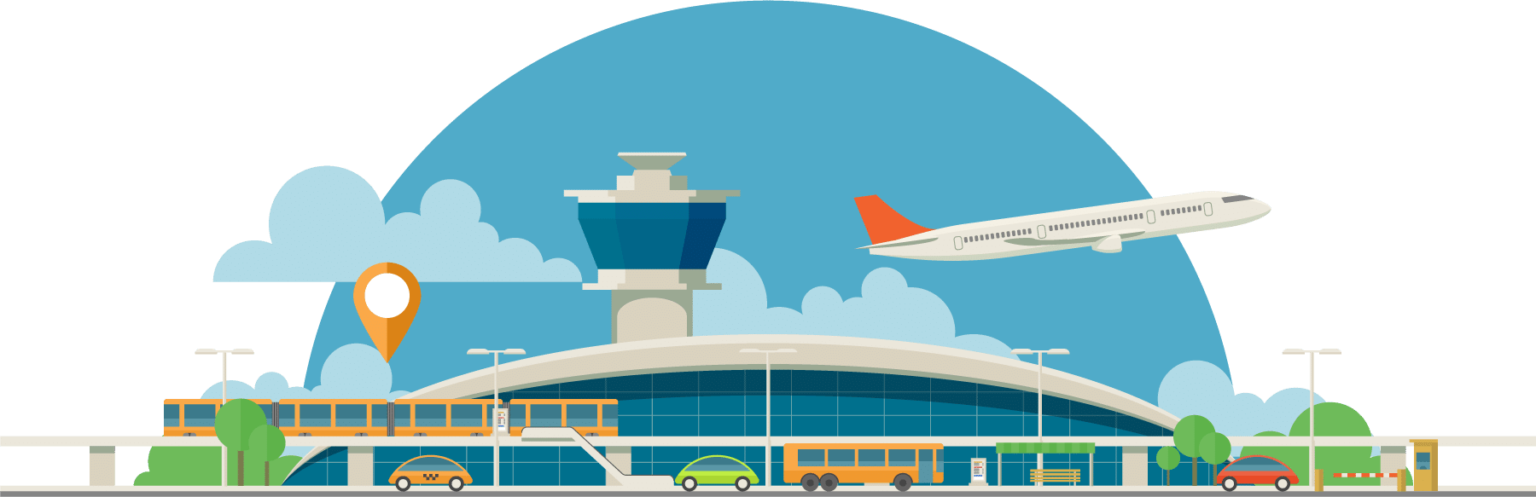

> Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода. <br/> А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, -- текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

Брать код из открытых источников позволительно. Следование культуре цитирования при этом обязательно

In [1]:
!pip install catboost
!pip install mlxtend --upgrade
!pip install optuna
!pip install lime
!pip install shap
!pip install missingno
!pip install psycopg2-binary
#!pip install xgboost
#!brew install cmake libomp
#!pip install lightgbm


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
     ---------------- --------------------- 20.5/47.0 kB 217.9 kB/s eta 0:00:01
     ------------------------ ------------- 30.7/47.0 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 261.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.0 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.1/101.0 MB 656.4 kB/s eta 0:02:34
   ---------------------------------------- 0.1/101.0 MB 656.4 kB/s eta 0:02:34
   ---------------------------------------- 0.1/101.0 MB 774.0 kB/s eta 0:02:11
   ---------------------------------------- 0.2/101.0 MB 748.1 kB/s eta 0:02:15
   ---------------------------------------- 0.2/101.0 MB 692.4 kB/s eta 0:02:26
   ---------------------------------------- 0.2/101.0 MB 718.0 kB


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB 1.3 MB/s eta 0:00:01
     --------------------- ------------------ 30.7/57.6 kB 1.3 MB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 196.9 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 196.9 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 196.9 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 196.9 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 137.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
   --- ----------------------------------- 41.0/413.4 kB 653.6 kB/s eta 0:00:01
   --- ----------------------------------- 41.0/413.4 kB 653.6 kB/s eta 0:00:01
   -------- ------------------------------ 92.2/413.4 kB 751.6 kB/s eta 0:00:01
   ---------------- --------------------- 174.1/413.4 kB 


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/275.7 kB 435.7 kB/s eta 0:00:01
     ---------- -------------------------- 81.9/275.7 kB 573.4 kB/s eta 0:00:01
     ------------------ ----------------- 143.4/275.7 kB 774.0 kB/s eta 0:00:01
     --------------------------------- ---- 245.8/275.7 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/24


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/448.0 kB ? eta -:--:--
   --- ----------------------------------- 41.0/448.0 kB 960.0 kB/s eta 0:00:01
   ---------- ----------------------------- 112.6/448.0 kB 1.3 MB/s eta 0:00:01
   ------------- -------------------------- 153.6/448.0 kB 1.1 MB/s eta 0:00:01
   --------------------- ------------------ 235.5/448.0 kB 1.2 MB/s eta 0:00:01
   -------------------------- ------------- 297.0/448.0 kB 1.2 MB/s eta 0:00:01
   ------------------------------------ --- 409.6/448.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 448.0/448.0 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.6 MB 1.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.2/2.6 MB 2.0 MB/s eta 0:00:02
   --- ------------------------------------ 0.3/2.6 MB 2.0 MB/s eta 0:00:02
   ----- ---------------------------------- 0.4/2.6 MB 1.9 MB/s eta 0:00


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 196.9 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.2 MB 302.7 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.2 MB 374.1 kB/s eta 0:00:03
   ---- ----------------------------------- 0.1/1.2 MB 400.9 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.2 MB 416.7 kB/s eta 0:00:03
   ------- -------------------------------- 0.2/1.2 MB 479.2 kB/s eta 0:00:03
   -------- ------------------------------- 0.3/1.2 MB 562.4 kB/s eta 0:00:02
   ---------- ----------------------------- 0.3/1.2 MB 613.6 kB/s eta 0:00:02
   ------------ --------------------------- 0.4/1.2 MB 655.2 kB/s eta 0:00:02
   -------------- ------------------------- 0.4/1.2 MB 690.9 kB/s eta 0:00:02
   ----------


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno

import psycopg2
import psycopg2.extras

from mlxtend.plotting import plot_decision_regions 
from mlxtend.evaluate import bias_variance_decomp
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.calibration import CalibrationDisplay
from sklearn.isotonic import IsotonicRegression

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from catboost import CatBoostClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import SequentialFeatureSelector, RFE, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator

import shap
import lime
import lime.lime_tabular

import optuna

import pickle

np.random.seed(42)


# Data Prep & EDA (3 балла)

## Загрузка и предобработка данных (1.75 балла)

In [7]:
!mkdir -p ~/.postgresql && \
wget "https://storage.yandexcloud.net/cloud-certs/CA.pem" \
    --output-document ~/.postgresql/root.crt && \
chmod 0600 ~/.postgresql/root.crt

�訡�� � ᨭ⠪�� �������.


(0.5 балла) <font color='#9933CC'>Подключитесь к БД при помощи `psycopg2.connect()` и напишите SQL-запрос, объединяющий 3 нужные таблицы в одну</font>.
Список столбцов таблиц добудьте самостоятельно. 

<font color='#9933CC'>Результат запроса поместите в `pd.DataFrame`. Индексом получившегося датафрейма сделайте столбец 'id'</font>

> Не забудьте закрыть соединение. Или открывайте соединение, используя менеджер контекста `with as`, который закроет его автоматически

### Параметры соединения
```
host=rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net
port=6432
sslmode=verify-full
dbname=db_flights
user=mlhs_student
password=mlhs_student
target_session_attrs=read-write```
```

### Схема БД

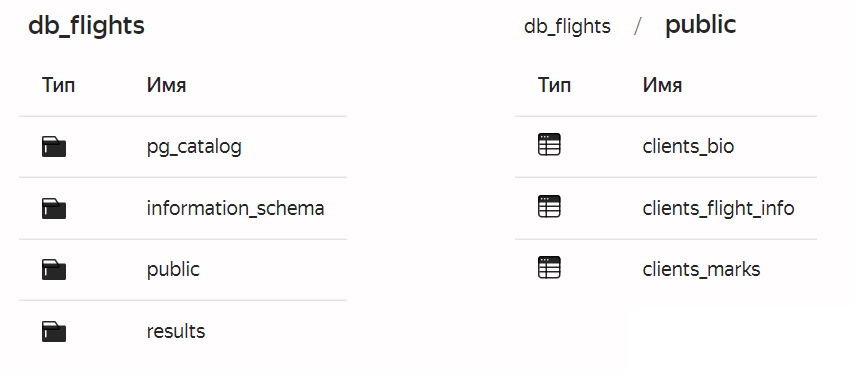

In [9]:
# your code below
params = """
    host=rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net 
    port=6432 
    sslmode=require
    dbname=db_flights 
    user=mlhs_student 
    password=mlhs_student 
    target_session_attrs=read-write
"""
with psycopg2.connect(params) as conn:
    query = """
    SELECT * 
    FROM clients_bio as b
    INNER JOIN clients_flight_info as i USING (id)
    INNER JOIN clients_marks as m USING (id)
    """
    data = pd.read_sql_query(query, conn)



pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


In [11]:
df = data.drop(columns='id')
df.index = data['id']
df


gender   age      Customer Type   Type of Travel     class  \
id                                                                   
7         Male  43.0     Loyal Customer  Business travel  Business   
13        Male  24.0  disloyal Customer  Business travel       Eco   
18      Female  61.0     Loyal Customer  Personal Travel       Eco   
31        Male  35.0  disloyal Customer  Business travel  Business   
39      Female  46.0     Loyal Customer  Business travel  Business   
...        ...   ...                ...              ...       ...   
129838  Female  59.0     Loyal Customer  Personal Travel       Eco   
129839    Male  61.0     Loyal Customer  Personal Travel       Eco   
129846    Male  44.0     Loyal Customer  Personal Travel       Eco   
129868    Male  47.0     Loyal Customer  Business travel  Eco Plus   
129876    Male  28.0     Loyal Customer  Personal Travel  Eco Plus   

       Flight Distance Departure Delay in Minutes Arrival Delay in Minutes  \
id                                                                           
7               1963.0                        0.0                      0.0   
13               453.0                       16.0                     30.0   
18               821.0                        0.0                      0.0   
31               212.0                        0.0                      0.0   
39                67.0                        0.0                      0.0   
...                ...                        ...                      ...   
129838           308.0                       32.0                     24.0   
129839           337.0                        0.0                      0.0   
129846           447.0                        0.0                      0.0   
129868           447.0                        0.0                      0.0   
129876           447.0                        2.0                      3.0   

       Inflight wifi service Departure/Arrival time convenient  ...  \
id                                                              ...   
7                        3.0                               3.0  ...   
13                       2.0                               2.0  ...   
18                       2.0                               5.0  ...   
31                       2.0                               2.0  ...   
39                       3.0                               3.0  ...   
...                      ...                               ...  ...   
129838                   3.0                               5.0  ...   
129839                   2.0                               4.0  ...   
129846                   2.0                               5.0  ...   
129868                   3.0                               4.0  ...   
129876                   4.0                               4.0  ...   

       Online boarding Seat comfort Inflight entertainment On-board service  \
id                                                                            
7                  4.0          5.0                    5.0              5.0   
13                 2.0          5.0                    5.0              2.0   
18                 1.0          5.0                    5.0              5.0   
31                 2.0          2.0                    2.0              4.0   
39                 5.0          4.0                    4.0              4.0   
...                ...          ...                    ...              ...   
129838             5.0          5.0                    3.0              3.0   
129839             2.0          3.0                    3.0              4.0   
129846             2.0          5.0                    5.0              4.0   
129868             3.0          4.0                    4.0              2.0   
129876             4.0          1.0                    4.0              5.0   

       Leg room service Baggage handling Checkin service Inflight service  \
id                                                   

In [12]:
assert df.shape == (129_549, 23)

(0.25 балла) <font color='#9933CC'>Преобразуйте числовые столбцы в `float`. Проверьте, есть ли в датафрейме пропуски и выбросы (в том числе в категориальных признаках)</font>.

In [13]:
for column in df.columns:
    df[column]  = df[column].astype(float, errors='ignore')
df.dtypes

gender                                object
age                                  float64
Customer Type                         object
Type of Travel                        object
class                                 object
Flight Distance                      float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Inflight wifi service                float64
Departure/Arrival time convenient    float64
Ease of Online booking               float64
Gate location                        float64
Food and drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
cleanliness                          float64
satisfacti

In [14]:
for c in df.columns:
    if na_counts := len(df[df[c].isna()]):
        print(c, na_counts)


age 315
Flight Distance 94
Departure Delay in Minutes 107
Arrival Delay in Minutes 507
Inflight wifi service 44
Departure/Arrival time convenient 49
Ease of Online booking 43
Gate location 37
Food and drink 50
Online boarding 46
Seat comfort 47
Inflight entertainment 45
On-board service 44
Leg room service 46
Baggage handling 48
Checkin service 42
Inflight service 63
cleanliness 37


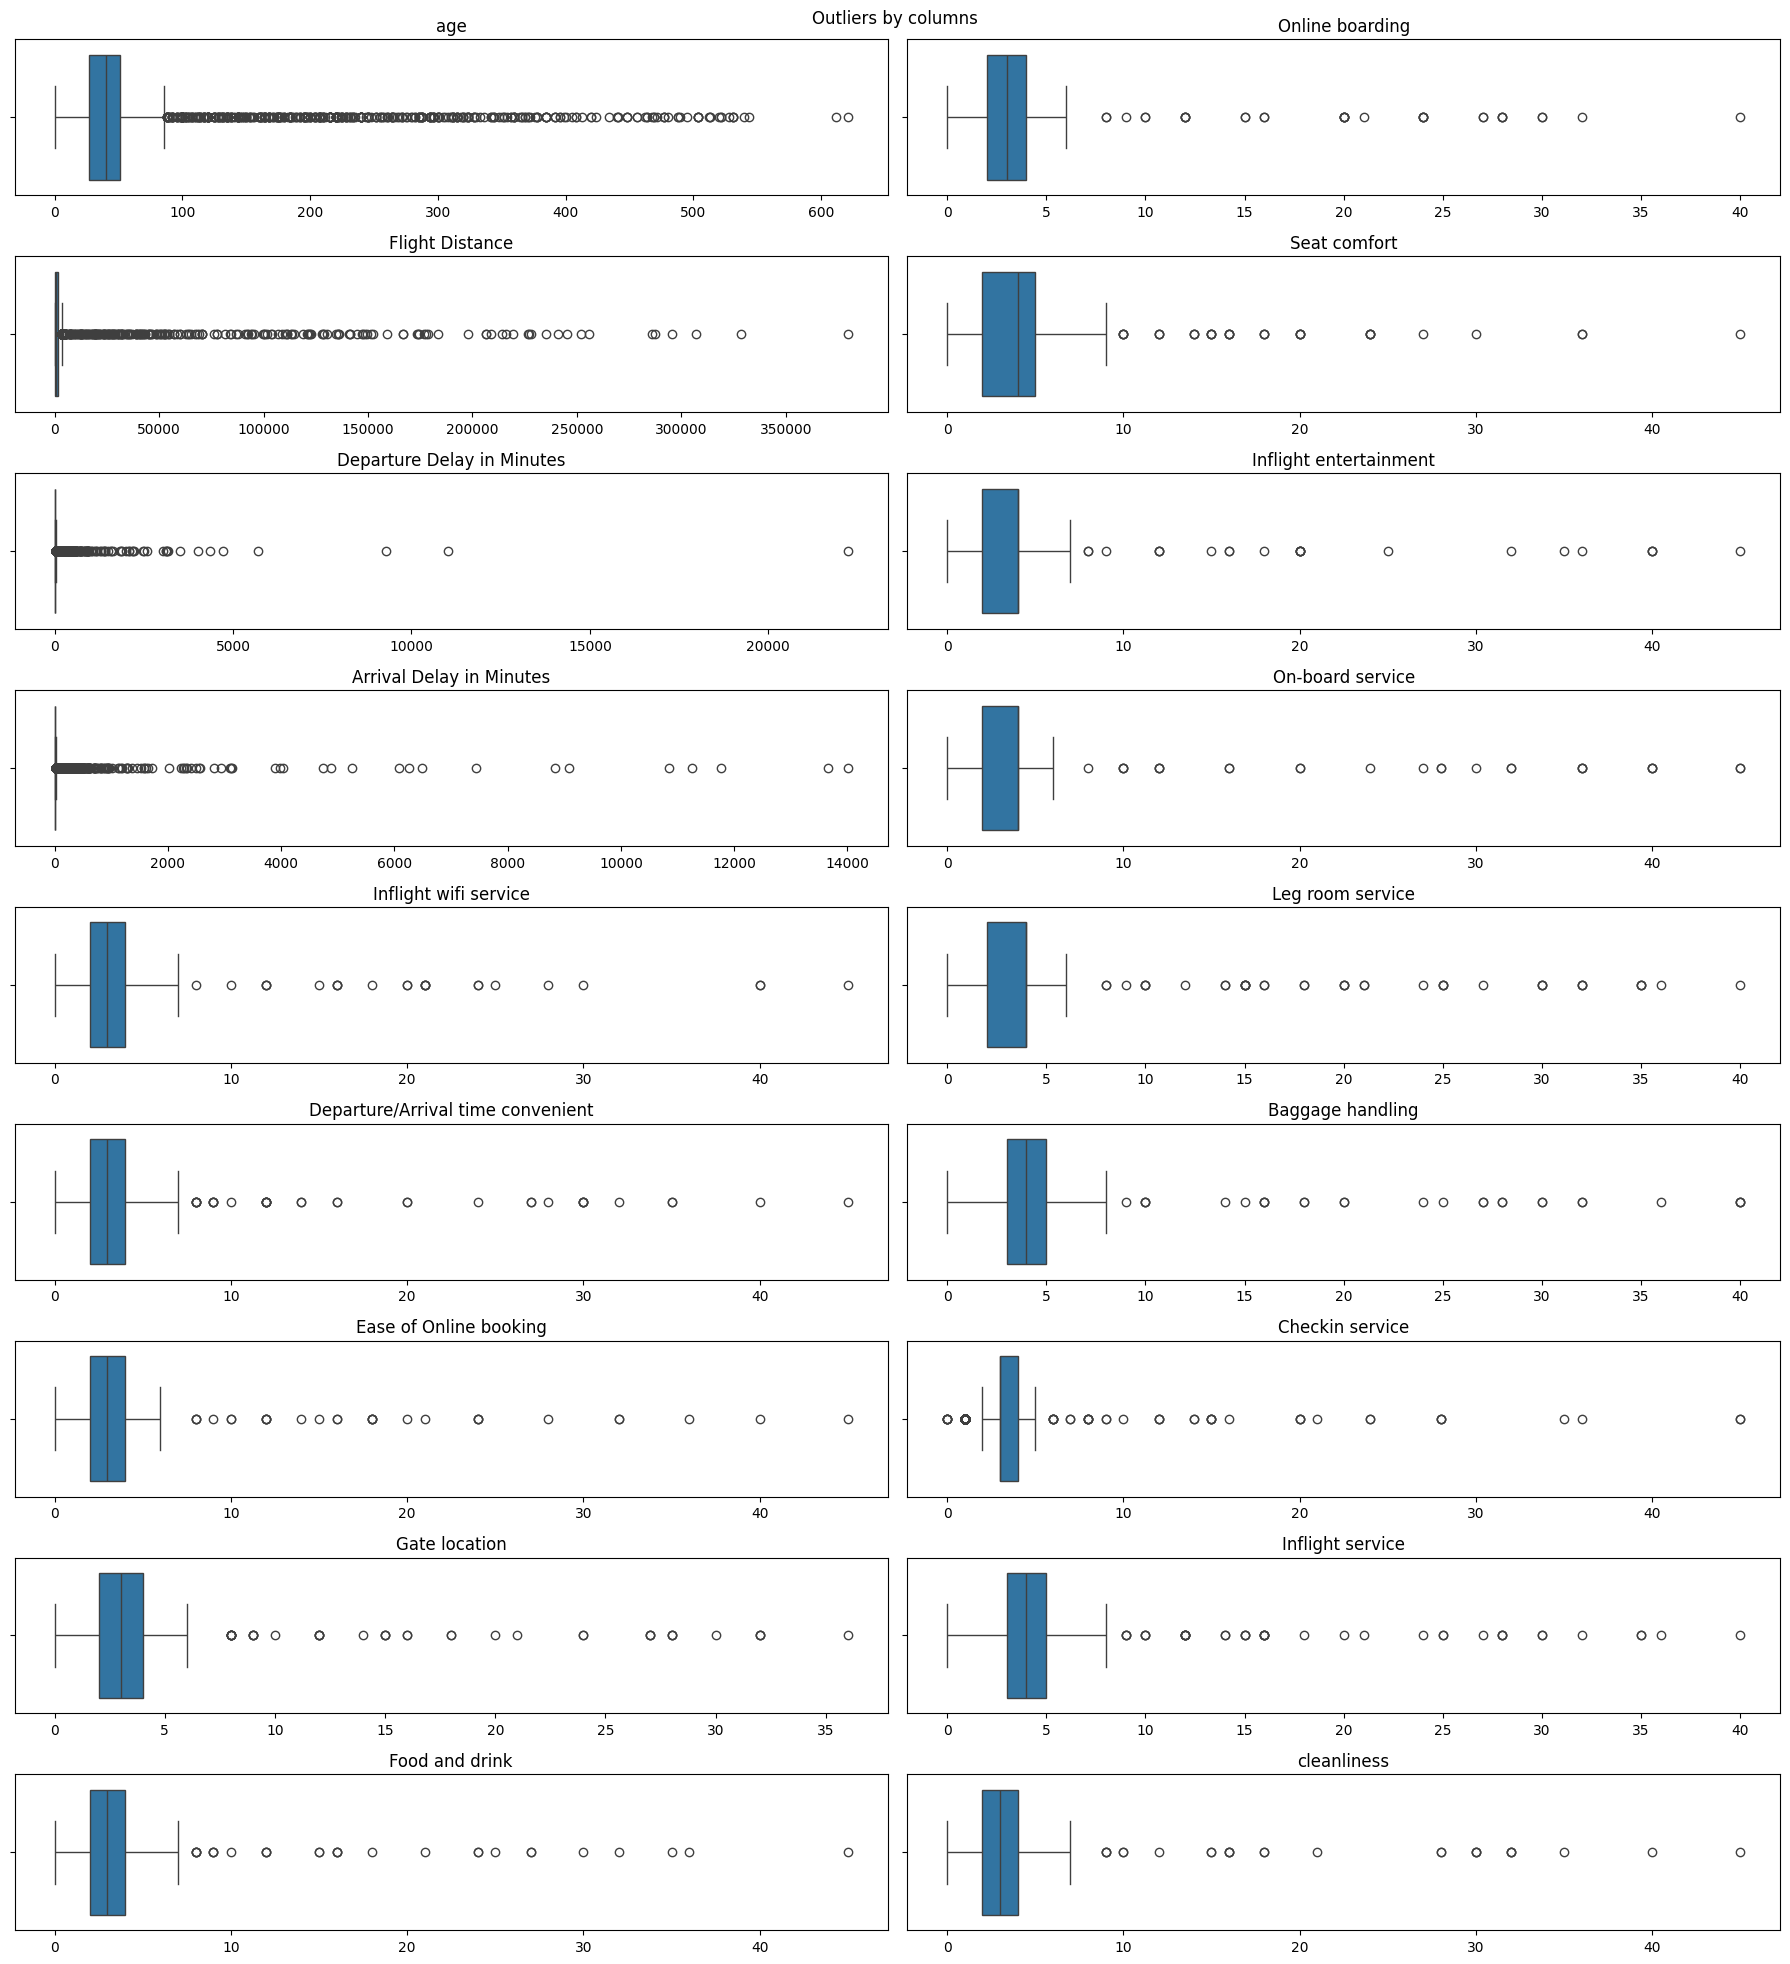

In [15]:
from math import ceil
from itertools import product

df_float = df.select_dtypes('float64')
len_col = len(df_float.columns)
fig, axes = plt.subplots(ceil(len_col / 2) , 2, figsize=(18, 20))
fig.suptitle('Outliers by columns')

for (x, y), col in zip(product(range(2), range(ceil(len_col / 2))), df_float.columns):
    axes[y, x].set_title(col)
    plot = sns.boxplot(ax=axes[y, x], x=df_float[col])
    plot.set(xlabel=None)
fig.tight_layout()

In [16]:
df2 = df.select_dtypes('object')
for col in df2.columns:
    display(df2[col].value_counts())

gender
Female    65726
Male      63823
Name: count, dtype: int64

Customer Type
Loyal Customer       105763
disloyal Customer     23709
nan                      77
Name: count, dtype: int64

Type of Travel
Business travel    89405
Personal Travel    40043
nan                  101
Name: count, dtype: int64

class
Business    61939
Eco         58115
Eco Plus     9379
nan           116
Name: count, dtype: int64

satisfaction
neutral or dissatisfied    58732
satisfied                  44912
-                          25905
Name: count, dtype: int64

In [17]:
df2 = df.select_dtypes('object')
df2 = df2.replace(['nan', '-'], np.nan)
df[df2.columns] = df2

(0.5 балла) <font color='#9933CC'>Воспользуйтесь модулем `missingno` для визуализации пропусков в датафрейме</font>

Нас интересует `matrix` пропущенных значений и столбцатая диаграмма в логарифмированной шкале (*пропусков немного => по обычной не будет видно, в каких столбцах их больше*)

<Axes: >

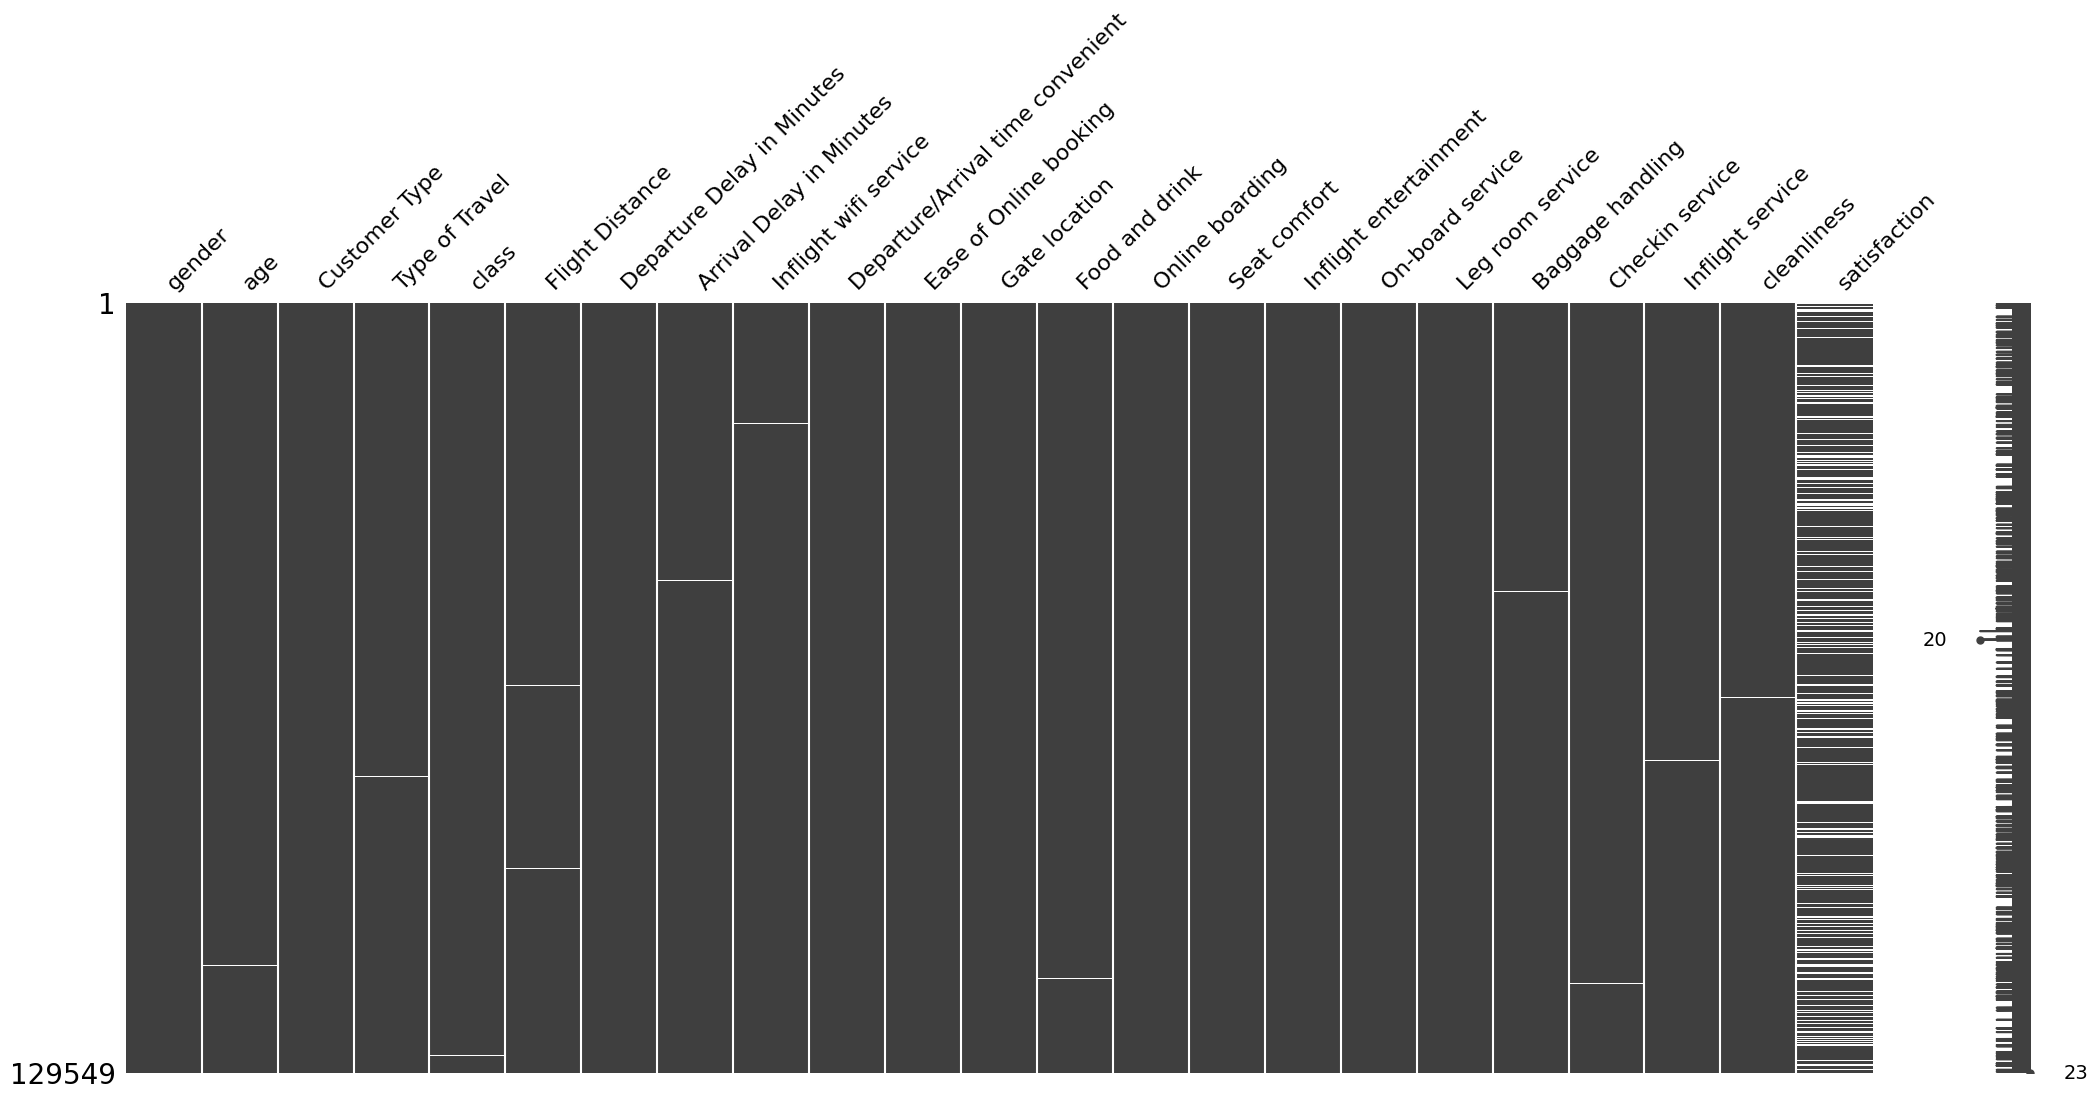

In [18]:
missingno.matrix(df)


set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


<Axes: >

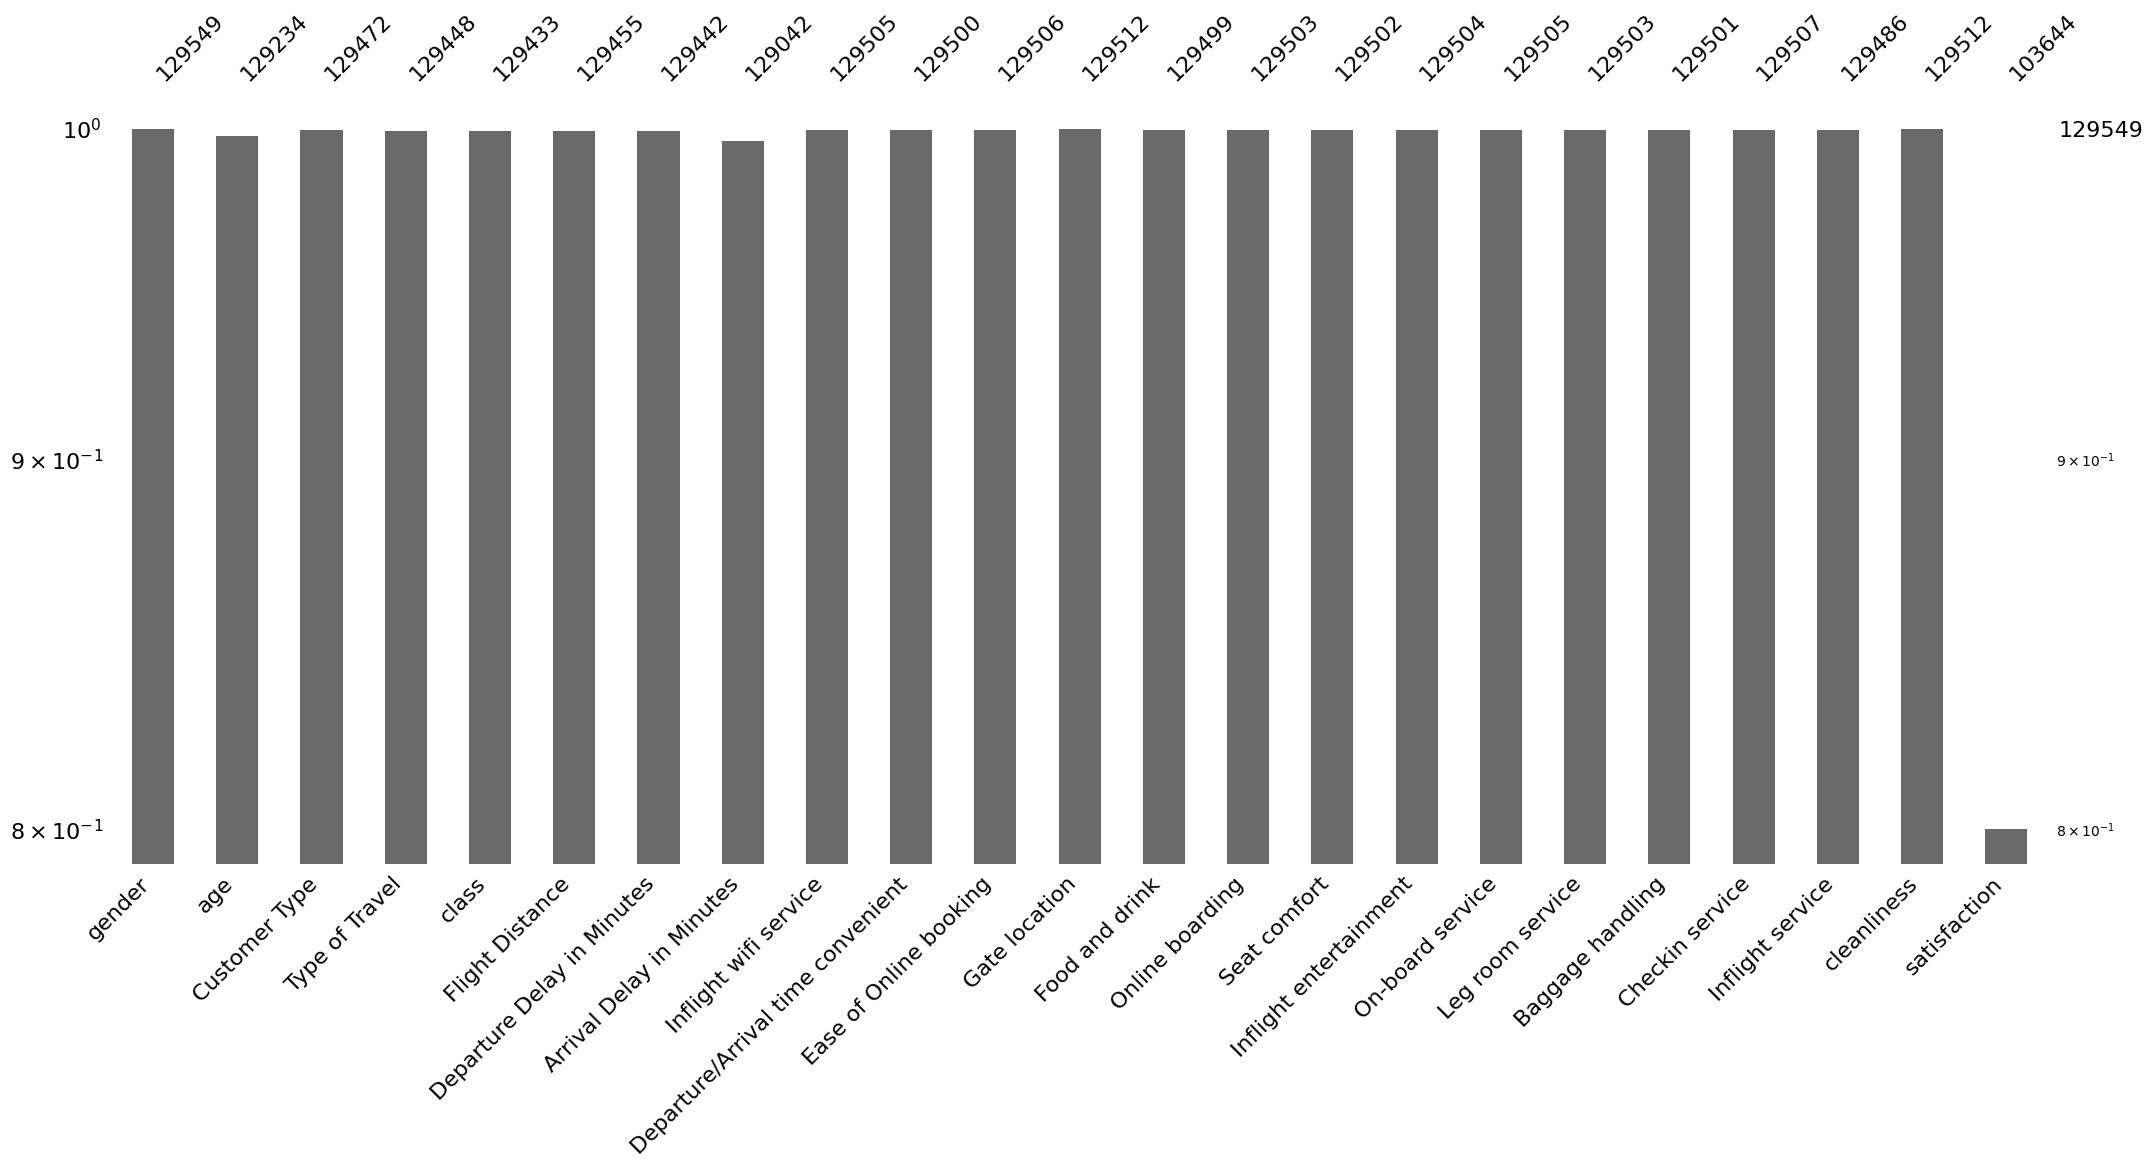

In [19]:
missingno.bar(df, log=True)


Разобьем датасет на тренировочную и тестовую части. Тестовую часть отложим надолго -- до самого конца этого ноутбука

In [30]:
df_train = df[df.satisfaction.notna()]
df_train

gender   age      Customer Type   Type of Travel     class  \
id                                                                   
7         Male  43.0     Loyal Customer  Business travel  Business   
13        Male  24.0  disloyal Customer  Business travel       Eco   
18      Female  61.0     Loyal Customer  Personal Travel       Eco   
31        Male  35.0  disloyal Customer  Business travel  Business   
39      Female  46.0     Loyal Customer  Business travel  Business   
...        ...   ...                ...              ...       ...   
129831  Female  28.0     Loyal Customer  Personal Travel       Eco   
129837    Male  66.0     Loyal Customer  Personal Travel       Eco   
129838  Female  59.0     Loyal Customer  Personal Travel       Eco   
129839    Male  61.0     Loyal Customer  Personal Travel       Eco   
129846    Male  44.0     Loyal Customer  Personal Travel       Eco   

        Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
id                                                                              
7                1963.0                         0.0                       0.0   
13                453.0                        16.0                      30.0   
18                821.0                         0.0                       0.0   
31                212.0                         0.0                       0.0   
39                 67.0                         0.0                       0.0   
...                 ...                         ...                       ...   
129831            447.0                        23.0                      16.0   
129837            337.0                       199.0                     213.0   
129838            308.0                        32.0                      24.0   
129839            337.0                         0.0                       0.0   
129846            447.0                         0.0                       0.0   

        Inflight wifi service  Departure/Arrival time convenient  ...  \
id                                                                ...   
7                         3.0                                3.0  ...   
13                        2.0                                2.0  ...   
18                        2.0                                5.0  ...   
31                        2.0                                2.0  ...   
39                        3.0                                3.0  ...   
...                       ...                                ...  ...   
129831                    1.0                                3.0  ...   
129837                    2.0                                4.0  ...   
129838                    3.0                                5.0  ...   
129839                    2.0                                4.0  ...   
129846                    2.0                                5.0  ...   

        Online boarding  Seat comfort  Inflight entertainment  \
id                                                              
7                   4.0           5.0                     5.0   
13                  2.0           5.0                     5.0   
18                  1.0           5.0                     5.0   
31                  2.0           2.0                     2.0   
39                  5.0           4.0                     4.0   
...                 ...           ...                     ...   
129831              1.0           3.0                     3.0   
129837              5.0           5.0                     5.0   
129838              5.0           5.0                     3.0   
129839              2.0           3.0                     3.0   
129846              2.0           5.0                     5.0   

        On-board service  Leg room service  Baggage handling  Checkin service  \
id                                                                              
7                    5.0               5.0               5.0              4.0   
13  

In [31]:
assert df_train.shape == (103_644, 23)


In [32]:
df_test = df[df.satisfaction.isna()].drop('satisfaction', axis=1)
df_test

gender   age   Customer Type   Type of Travel     class  \
id                                                                
55        Male  36.0  Loyal Customer  Business travel  Business   
79      Female  70.0  Loyal Customer  Personal Travel       Eco   
126       Male  66.0  Loyal Customer  Personal Travel       Eco   
199     Female  60.0  Loyal Customer  Business travel  Business   
263       Male  43.0  Loyal Customer  Personal Travel  Business   
...        ...   ...             ...              ...       ...   
129750    Male  38.0  Loyal Customer  Business travel       Eco   
129771    Male  16.0  Loyal Customer  Personal Travel       Eco   
129798  Female  43.0  Loyal Customer  Personal Travel       Eco   
129868    Male  47.0  Loyal Customer  Business travel  Eco Plus   
129876    Male  28.0  Loyal Customer  Personal Travel  Eco Plus   

        Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
id                                                                              
55               3655.0                        40.0                      71.0   
79                108.0                        50.0                      41.0   
126               562.0                        88.0                      84.0   
199              3756.0                        36.0                      24.0   
263               802.0                         0.0                       0.0   
...                 ...                         ...                       ...   
129750            337.0                        92.0                      82.0   
129771            308.0                         2.0                       0.0   
129798            308.0                         0.0                       0.0   
129868            447.0                         0.0                       0.0   
129876            447.0                         2.0                       3.0   

        Inflight wifi service  Departure/Arrival time convenient  ...  \
id                                                                ...   
55                        1.0                                1.0  ...   
79                        5.0                                4.0  ...   
126                       2.0                                5.0  ...   
199                       4.0                                4.0  ...   
263                       1.0                                2.0  ...   
...                       ...                                ...  ...   
129750                    4.0                                3.0  ...   
129771                    3.0                                4.0  ...   
129798                    2.0                                4.0  ...   
129868                    3.0                                4.0  ...   
129876                    4.0                                4.0  ...   

        Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
id                                                                              
55                 1.0              3.0           3.0                     3.0   
79                 4.0              4.0           4.0                     3.0   
126                5.0              2.0           5.0                     5.0   
199                2.0              4.0           5.0                     4.0   
263                2.0              3.0           3.0                     2.0   
...                ...              ...           ...                     ...   
129750             4.0              5.0           4.0                     4.0   
129771             1.0              3.0           5.0                     1.0   
129798             3.0              5.0           5.0                     4.0   
129868             4.0              3.0           4.0                     4.0   
129876             4.0              4.0           1.0                     4.0   

        On-board service  Leg room service  Baggage handling  Checkin service 

In [33]:
assert df_test.shape == (25_905, 22)

Разбиваем данные на трейн и валидацию. Не меняйте сид

In [34]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop('satisfaction', axis=1), df_train.satisfaction, test_size=0.3, random_state=42)


In [35]:
assert X_train.shape == (72_550, 22)
assert X_val.shape == (31_094, 22)


(0.25 балла) <font color='#9933CC'>Заполните пропуски в данных наиболее часто встречающимся значением</font>.
Обратите внимание, что правильная стратегия заполнения пропусков выглядит так:

* посчитать моды для `X_train`
* ими заполнить пропуски в `X_train`, `X_val` и `df_test`

Было бы неплохо воспользоваться другой стратегией: восстановать пропуски `KNNImputer`'ом или `IterativeImputer`'ом. Но для признаков в нашей задаче они в чистом виде бы, увы, скорее, не подошли. Импьютеры возвращали бы вещественные значения, а в нашей задаче все признаки целые. 

В общем, для изящного и удобного для применения в пайплайне заполнения пропусков, пришлось бы кодить самописные классы. Этим можете заняться в бонусной части.

In [36]:
modes = X_train.mode().iloc[0]
X_train = X_train.fillna(modes)
X_val = X_val.fillna(modes)
df_test = df_test.fillna(modes)



<font color='#9933CC'>Выведите основные статистики по числовым и категориальным столбцам таблицы `X_train`</font>

In [37]:
display(X_train.describe())
display(X_train.describe(include='object'))

age  Flight Distance  Departure Delay in Minutes  \
count  72550.000000     72550.000000                72550.000000   
mean      40.098856      1329.018332                   15.859366   
std       20.658196      4764.369357                   70.861937   
min        0.000000         0.000000                    0.000000   
25%       27.000000       413.000000                    0.000000   
50%       40.000000       844.000000                    0.000000   
75%       51.000000      1744.000000                   12.000000   
max      544.000000    379620.000000                 9282.000000   

       Arrival Delay in Minutes  Inflight wifi service  \
count              72550.000000           72550.000000   
mean                  16.645968               2.733687   
std                   97.990293               1.362172   
min                    0.000000               0.000000   
25%                    0.000000               2.000000   
50%                    0.000000               3.000000   
75%                   13.000000               4.000000   
max                11760.000000              45.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       72550.000000            72550.000000   
mean                            3.065017                2.761006   
std                             1.552254                1.414843   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                            45.000000               28.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count   72550.000000    72550.000000     72550.000000  72550.000000   
mean        2.982688        3.209318         3.256513      3.445665   
std         1.316648        1.349963         1.372739      1.346077   
min         0.000000        0.000000         0.000000      0.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         3.000000      4.000000   
75%         4.000000        4.000000         4.000000      5.000000   
max        36.000000       36.000000        32.000000     45.000000   

       Inflight entertainment  On-board service  Leg room service  \
count            72550.000000      72550.000000      72550.000000   
mean                 3.362150          3.383101          3.352364   
std                  1.360862          1.333758          1.360180   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                 40.000000         45.000000         36.000000   

       Baggage handling  Checkin service  Inflight service   cleanliness  
count      72550.000000     72550.000000      72550.000000  72550.000000  
mean           3.630255         3.309056          3.640234      3.291178  
std            1.227853         1.293114          1.215114      1.343302  
min            0.000000         0.000000          0.000000      0.000000  
25%            3.000000         3.000000          3.000000      2.000000  
50%            4.000000         3.000000          4.000000      3.000000  
75%            5.000000         4.000000          5.000000      4.000000  
max           40.000000        45.000000         36.000000     45.000000

gender   Customer Type   Type of Travel     class
count    72550           72550            72550     72550
unique       2               2                2         3
top     Female  Loyal Customer  Business travel  Business
freq     36816           59406            50054     34793

<font color='#FF6600'>Что вы можете сказать про распределение значений признаков?</font>

In [39]:
print("Признаки age Flight, Distance и Departure Delay in Minutes в категории 75% сильно отличаются от других столбцов. Также имеются выбросы, поэтому необходимо будет промасштабировать столбцы. Категориальные признаки впорядке, они имеют по 2-3 значения, а значит есть возможность заменить на OHE.")



Признаки age Flight, Distance и Departure Delay in Minutes в категории 75% сильно отличаются от других столбцов. Также имеются выбросы, поэтому необходимо будет промасштабировать столбцы. Категориальные признаки впорядке, они имеют по 2-3 значения, а значит есть возможность заменить на OHE.


(0.25 балла) <font color='#9933CC'>Удалите строки c выбросами в числовых столбцах</font> (для трейна и валидации; тест оставьте без изменений). Выбросами считайте значения признака, строго превышающие 0.996-квантиль


---
<br/>

*Откуда взялся именно 0.996-квантиль?*

*В рамках анализа данных на выборсы вы вполне могли заметить, какие значения признаков встречаются редко. В среднем для всех признаков эти значения начинаются ~в этом квантиле*

In [40]:
quantile = X_train.quantile(0.996, numeric_only=True)
X_train = X_train[~(X_train[quantile.index].gt(quantile.values, axis='columns').any(axis=1))]
y_train = y_train.loc[X_train.index]
X_train.shape, y_train.shape


((71395, 22), (71395,))

In [41]:
X_val = X_val[~(X_val[quantile.index].gt(quantile.values, axis='columns').any(axis=1))]
y_val = y_val.loc[X_val.index]
X_val.shape, y_val.shape

((30600, 22), (30600,))

In [42]:
# assert X_train.shape == (71_369, 22) эти ассерты у большинства студентов не проходили
# assert X_val.shape == (30_609, 22) и это совершенно не принципиально
assert df_test.shape == (25_905, 22)

## EDA (1.25 балла)

Создадим переменные с перечислениями столбцов разного типа

In [43]:
continuous_cols = ['age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
ordinal_cols = list(set(df.select_dtypes(include='number').columns) - set(continuous_cols)) 
categorical_cols = list(df.select_dtypes(include='object').columns)[:-1]

In [44]:
assert len(continuous_cols + ordinal_cols + categorical_cols) == 22

(0.5 балла) <font color='#9933CC'>Напишите процедуры для отрисовки графиков</font>

* Для признаков, которые мы выделили как порядковые, отображайте только `countplot`
* Для тех, что считаем континуальными, -- гистограмму распределения признака и ящик с усами (inline)
* Для категориальных -- только `countplot`

Обязательно выделяйте таргет разными цветами. Мы же хотим в конечном итоге понять, чем удовлетворенные клиенты отличаются от недовольных.

> Все графики и их оси обязательно должны быть подписаны, легенда на графике также необходима

In [45]:
def plot_ordinal(cols, df, y):
    """Draws countplots for all columns in 'cols' with informative title"""
    for col in cols:
        b = sns.countplot(data=df, x=col, hue=y.values)
        b.set_title(f'{col} distribution')
        plt.show()


In [46]:
def plot_continuous(cols, df, y):
    """Draws kdeplots and boxplots in one row 
    for all columns in 'cols' with informative title 
    """
    for col in cols:
        fig, axes = plt.subplots(1 , 2, figsize=(10, 5))
        b = sns.kdeplot(data=df, x=col, hue=y.values, ax=axes[0])
        b.set_title(f'{col} distribution')
        b = sns.boxplot(data=df, x=col, hue=y.values, ax=axes[1], gap=0.1)
        b.set_title(f'{col} boxplot by target')
        fig.tight_layout()
        plt.show()


In [47]:
def plot_categorical(cols, df, y):
    """Draws countplots for all columns in 'cols' with informative title"""
    plot_ordinal(cols, df, y)


<font color='#9933CC'>Вызовите все 3 написанные процедуры для соответствующих колонок `X_train`. Отдельно визуализируйте распределение таргета в трейне</font>

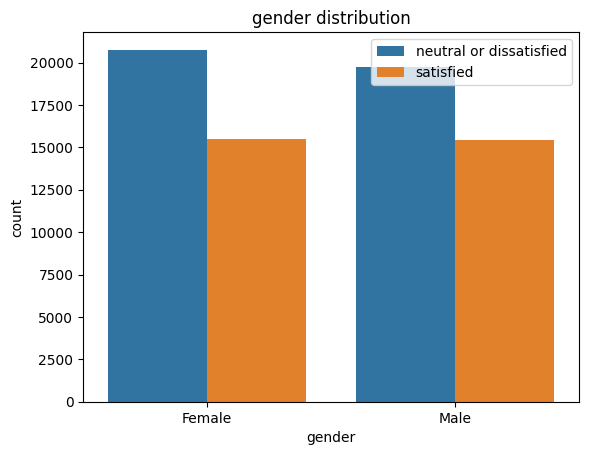

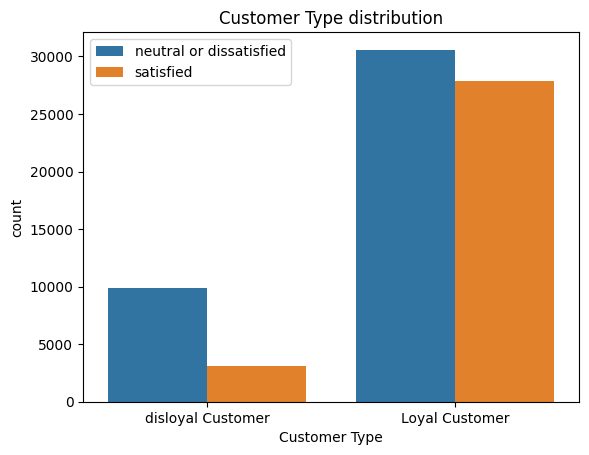

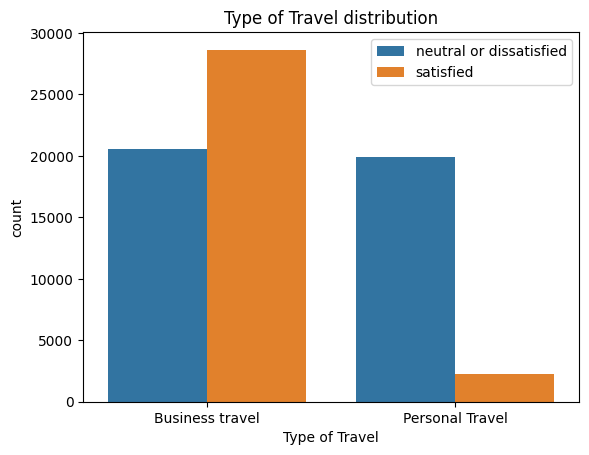

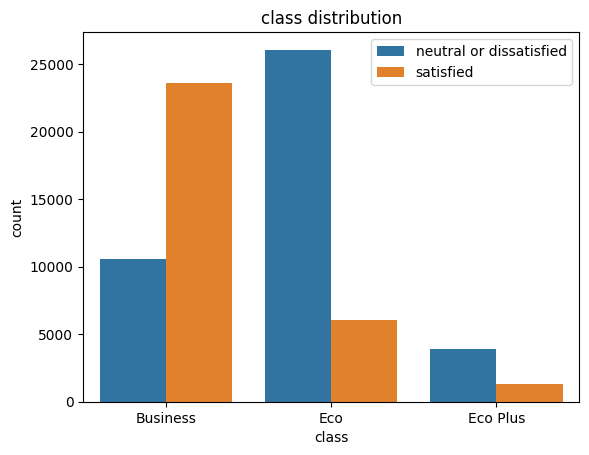

In [48]:
plot_categorical(categorical_cols, X_train, y_train)

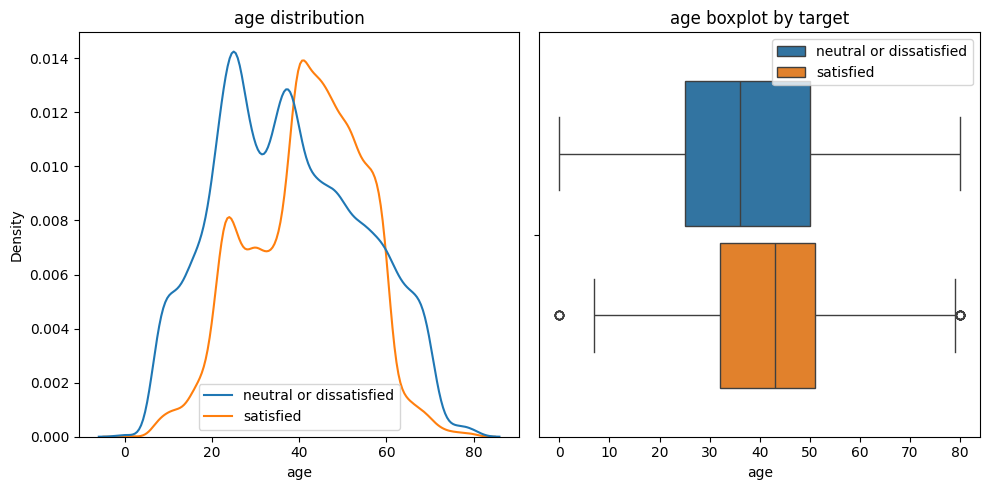

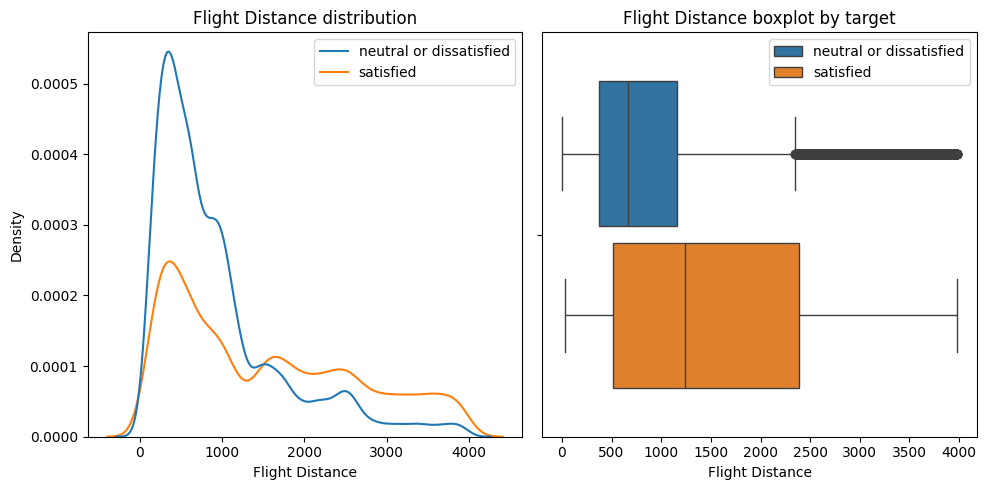

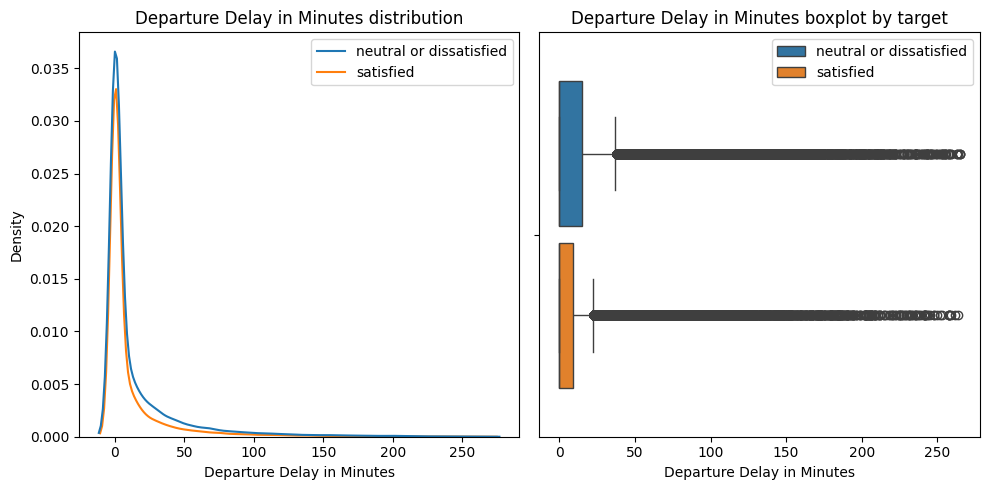

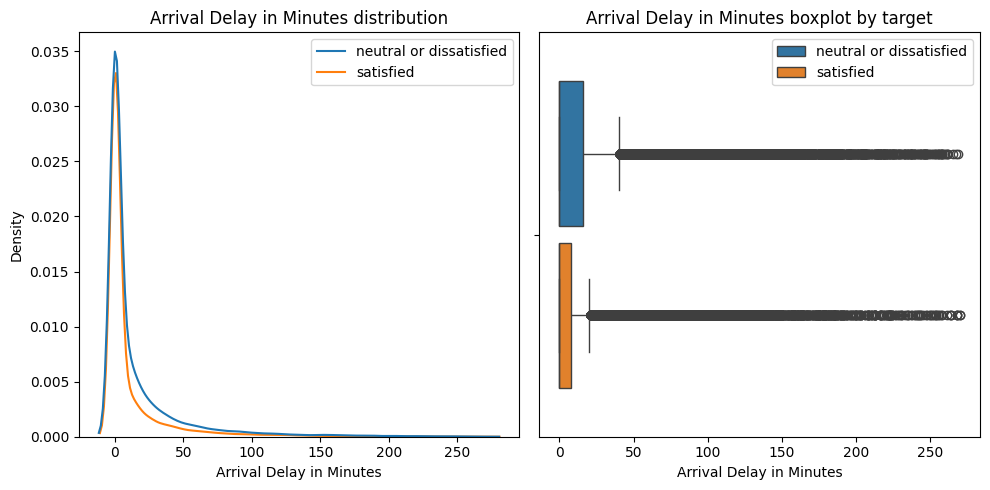

In [49]:
plot_continuous(continuous_cols, X_train, y_train)

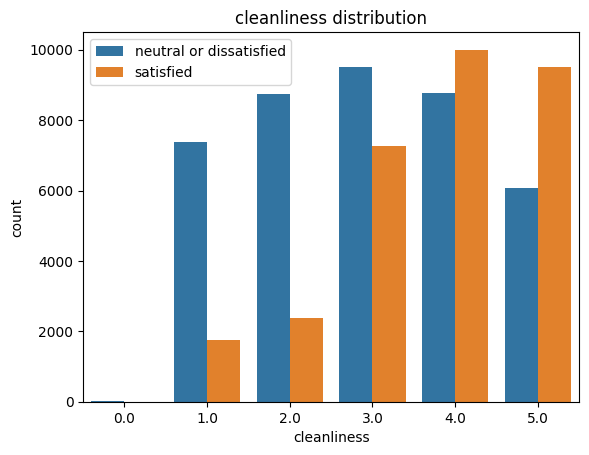

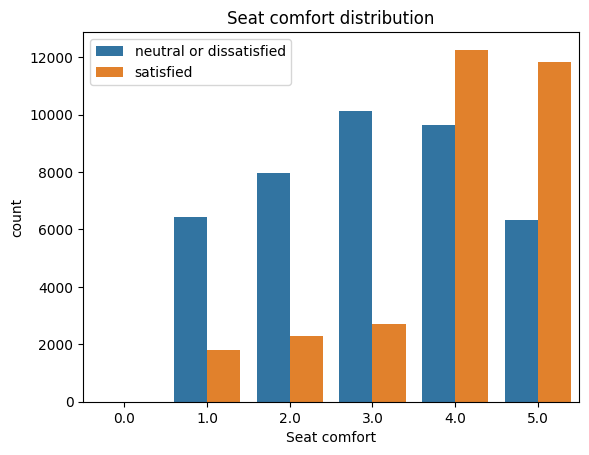

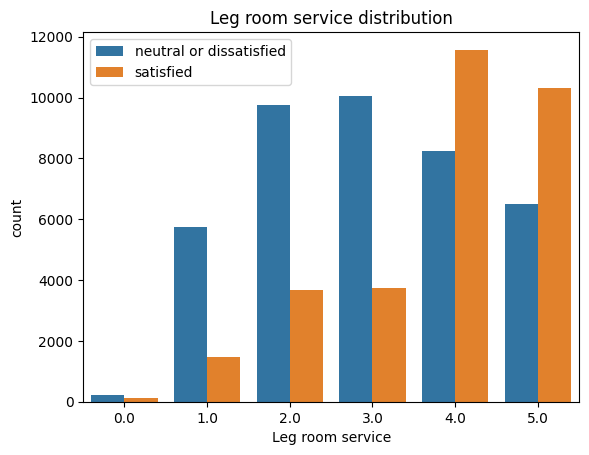

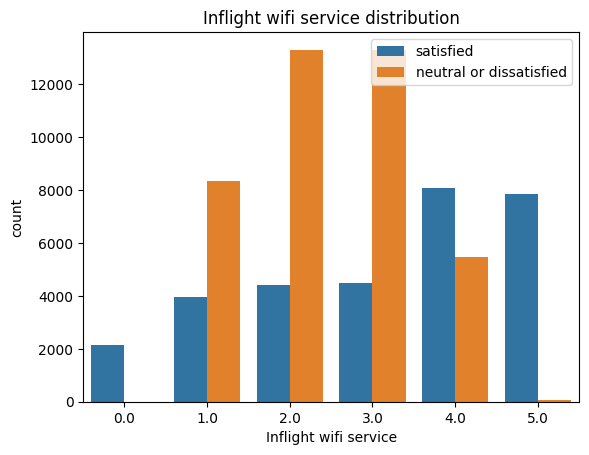

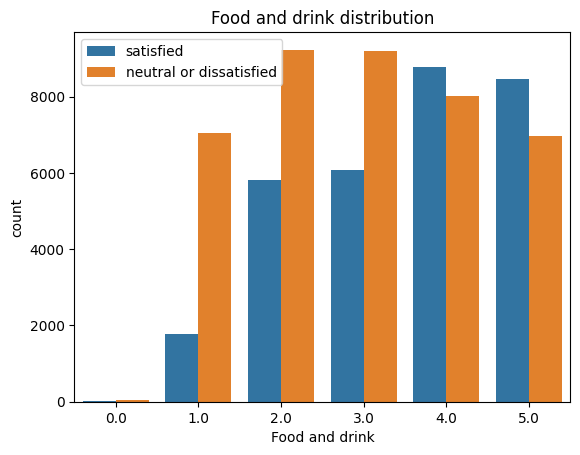

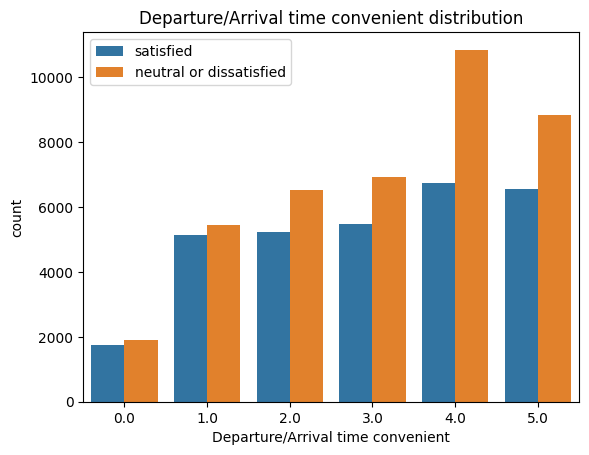

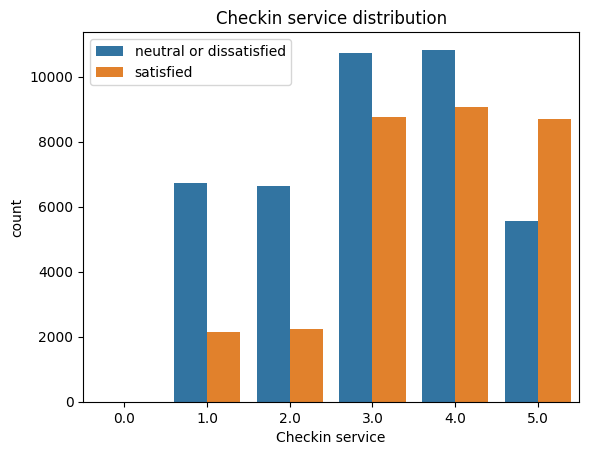

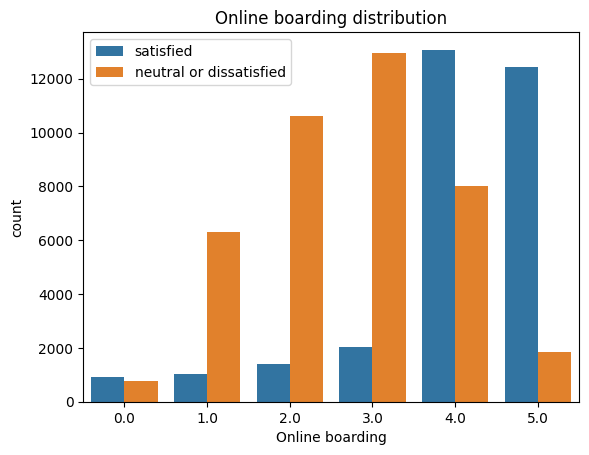

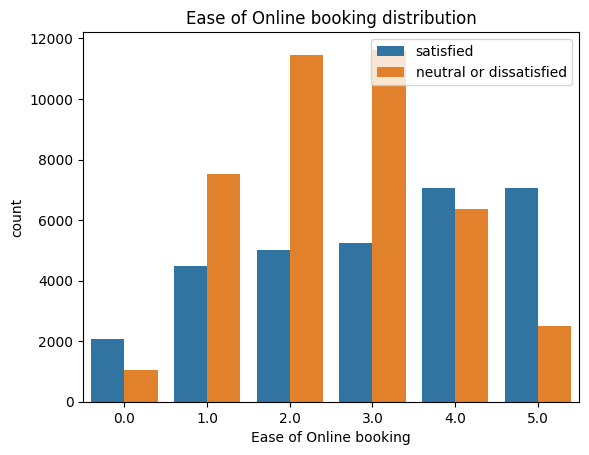

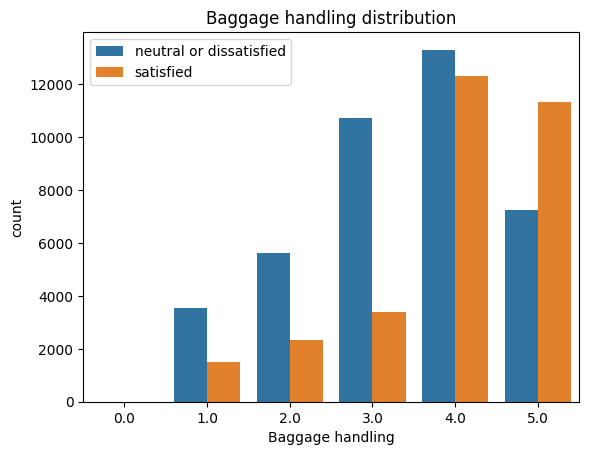

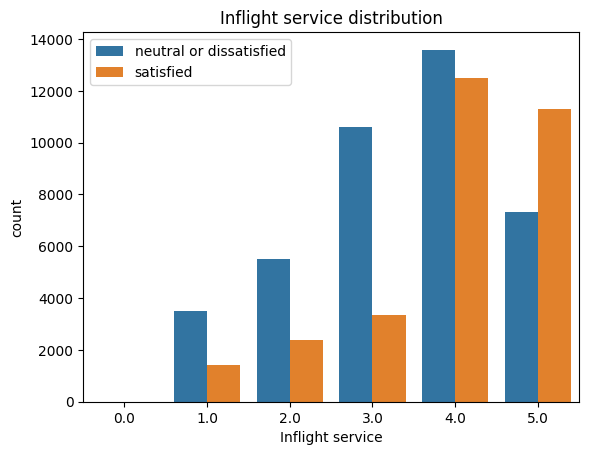

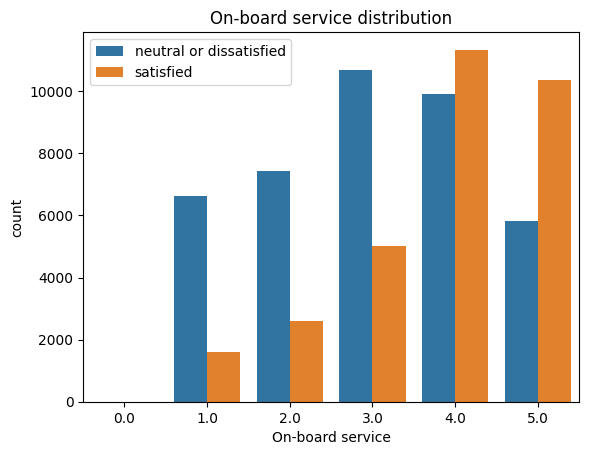

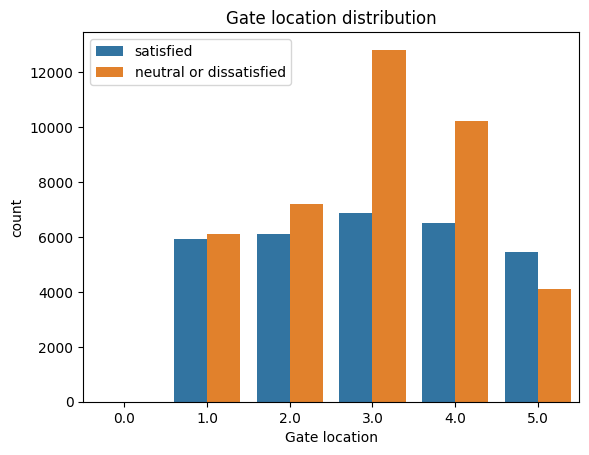

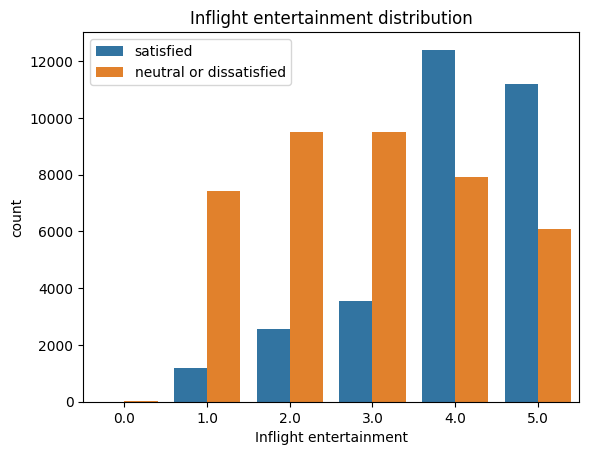

In [50]:
plot_ordinal(ordinal_cols, X_train, y_train)

<Axes: xlabel='satisfaction', ylabel='count'>

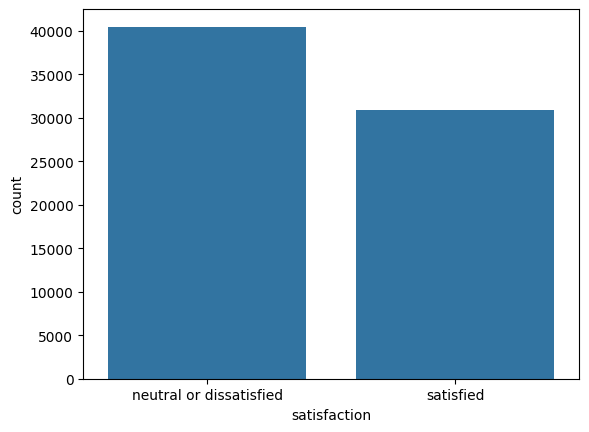

In [51]:
sns.countplot(x=y_train)

<font color='#FF6600'>Сделайте выводы по построенным графикам</font>. Полезно было бы упомянуть:
* какие признаки распределены неравномерно
* сбалансированы ли классы
* какие распределения имеют континуальные признаки

1) Flight Distance и Departure Delay in Minutes
2) Классы по всем объектам почти сбалансированы

(Бонус: 0.25 балла) <font color='#9933CC'>По графикам (каким, решите сами) оцените, похожи ли оказались распределения признаков при разбиении на трейн, валидацию и тест </font>

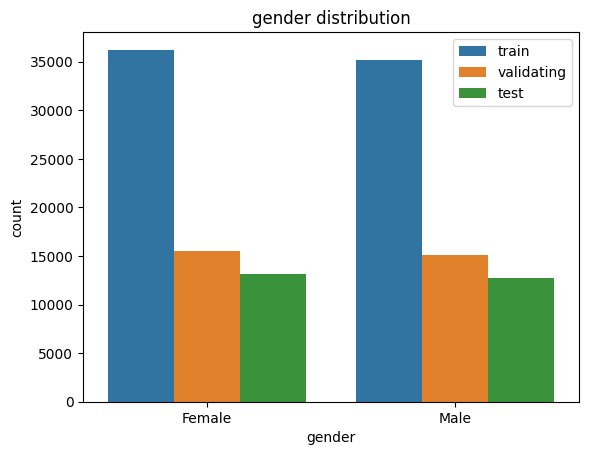

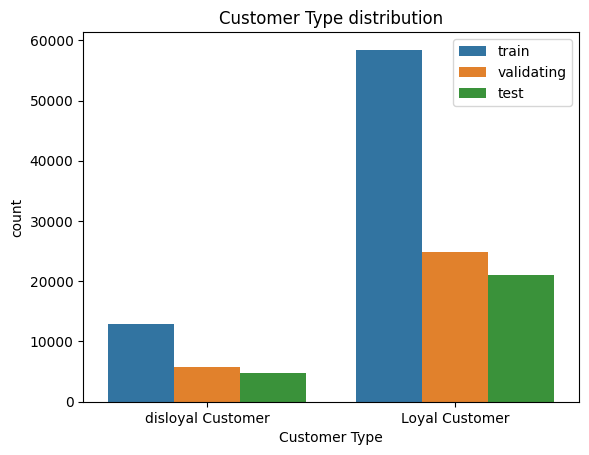

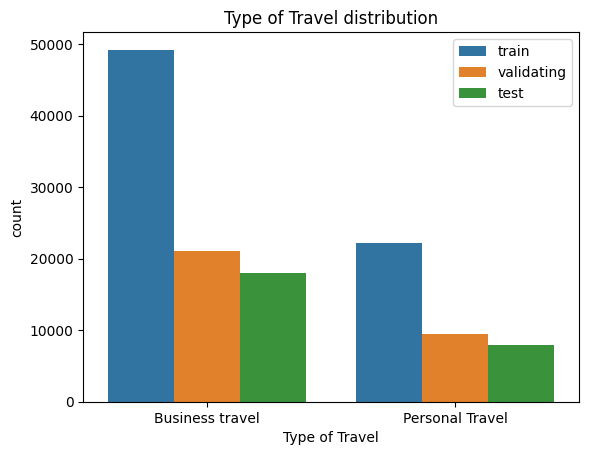

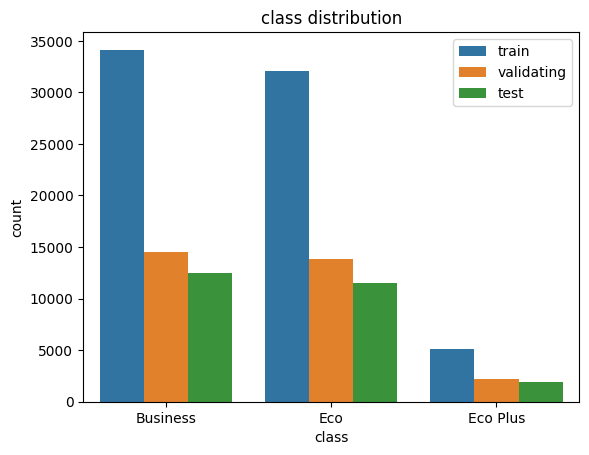

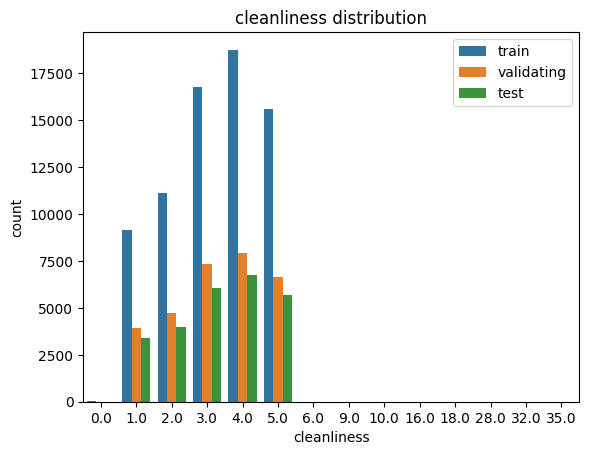

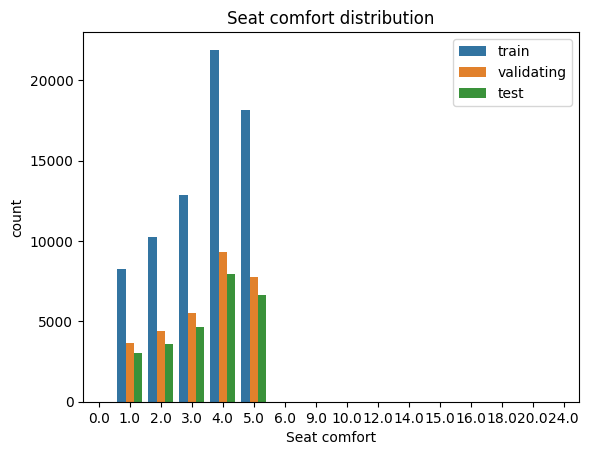

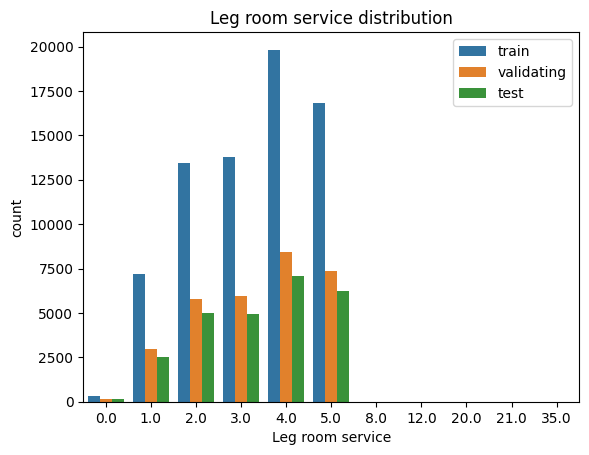

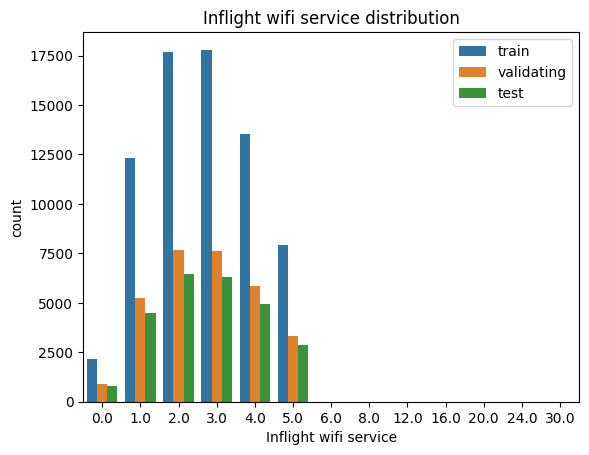

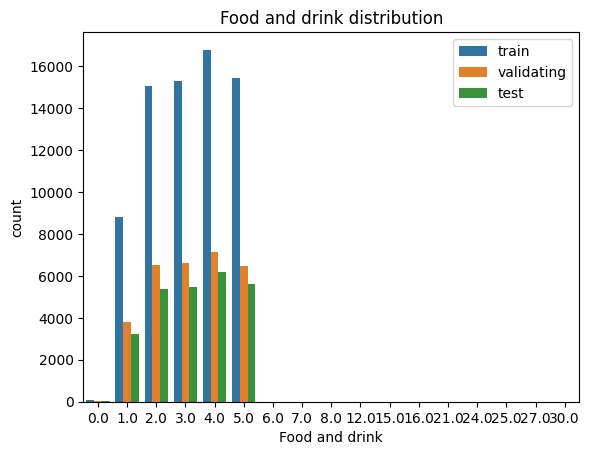

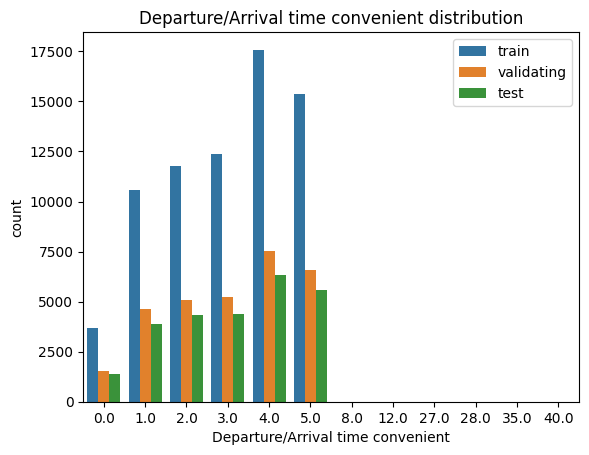

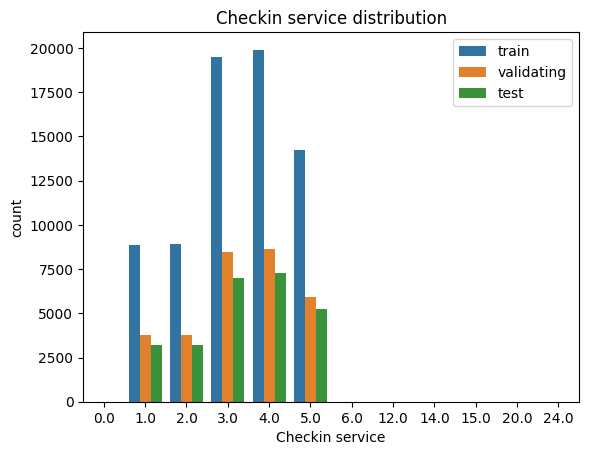

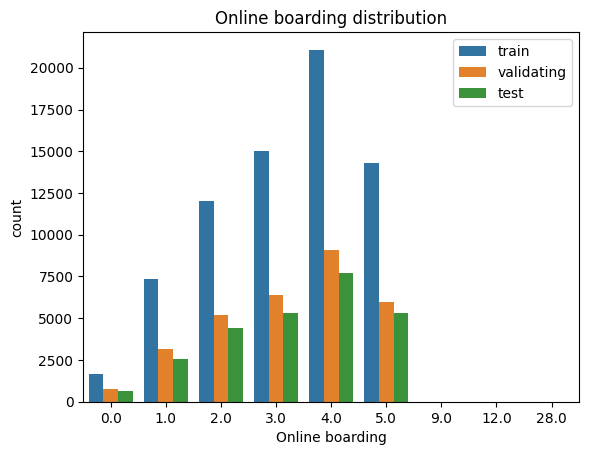

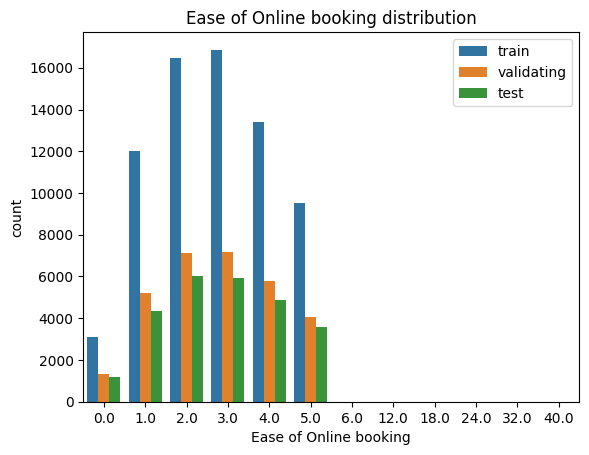

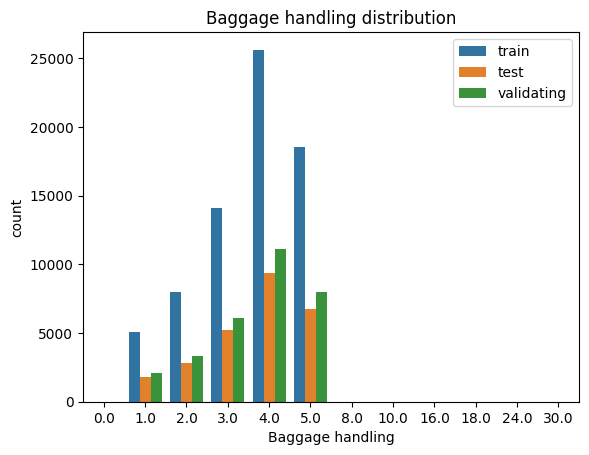

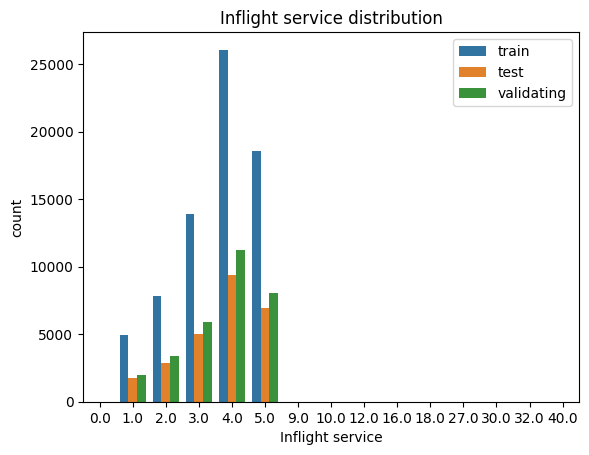

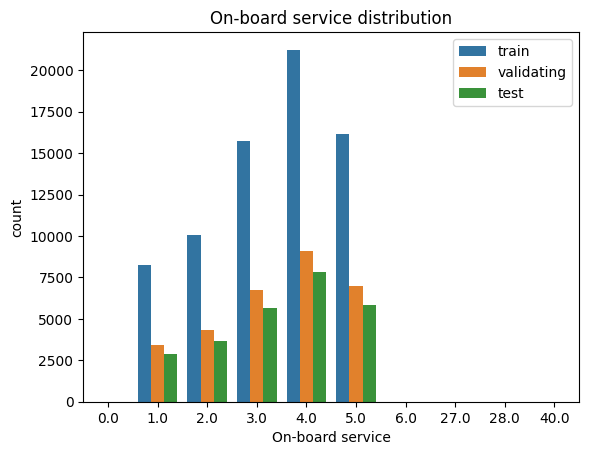

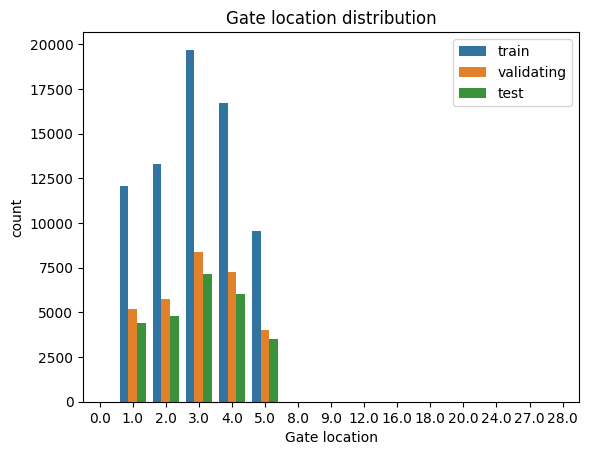

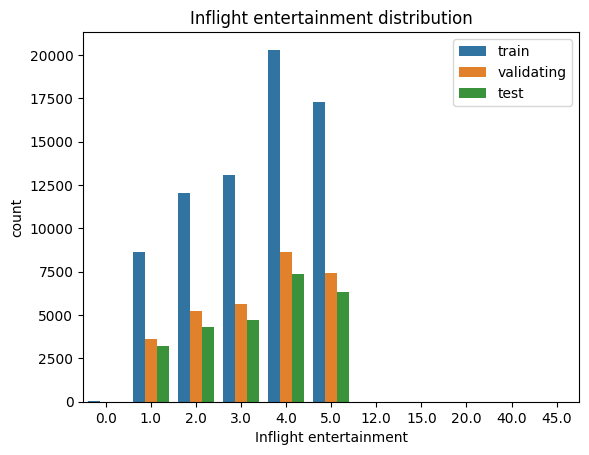

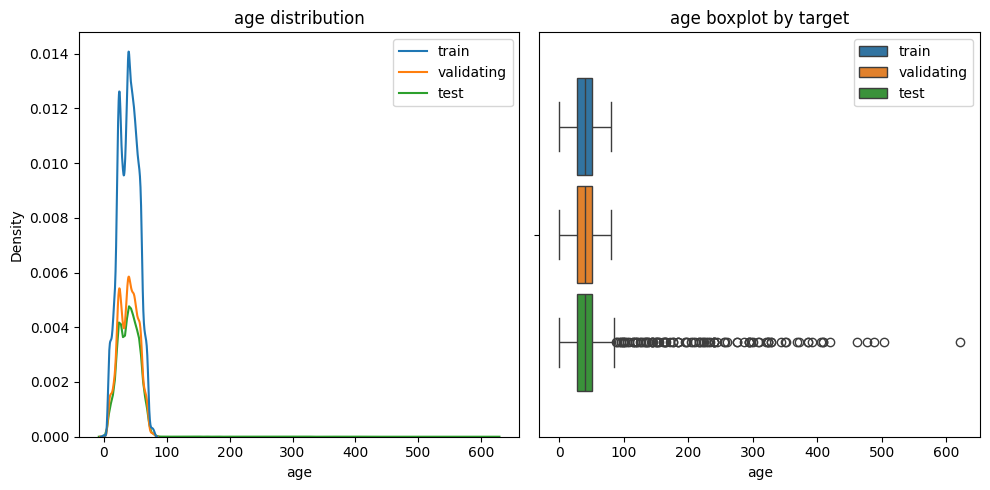

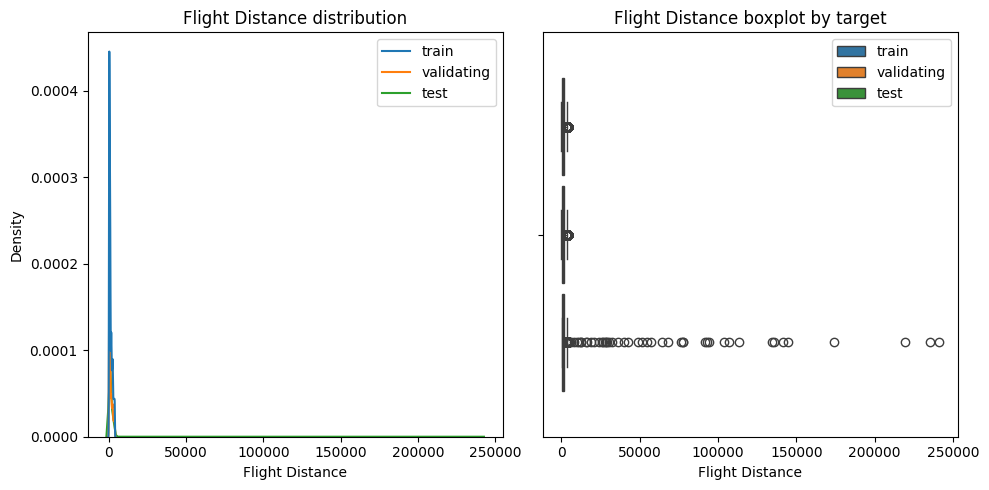

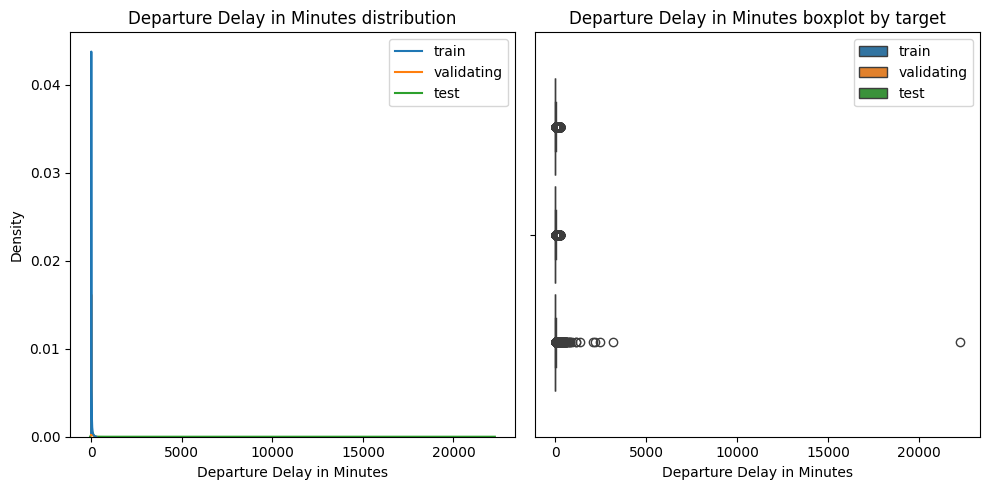

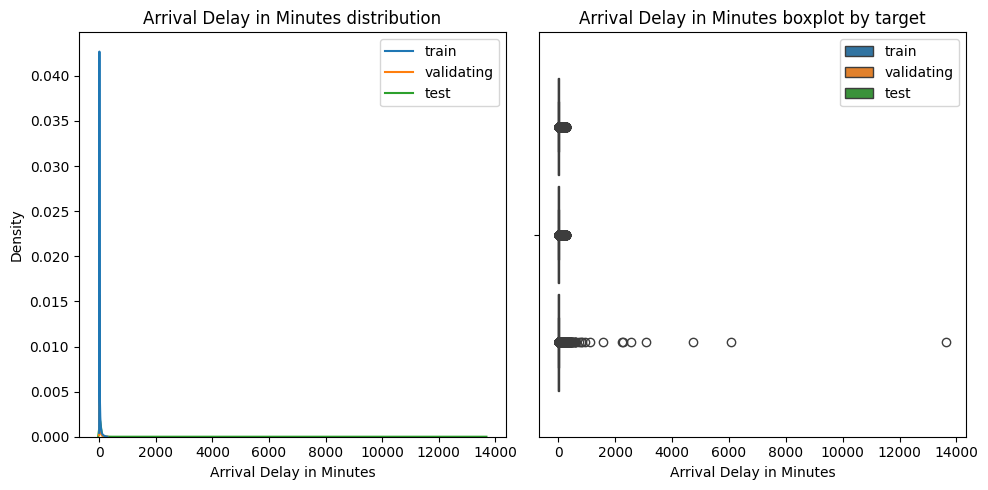

In [52]:
X_together = pd.concat([X_train, X_val, df_test])
y_together = pd.concat([
    pd.Series(['train']).repeat(len(X_train)),
    pd.Series(['validating']).repeat(len(X_val)),
    pd.Series(['test']).repeat(len(df_test)),
    ])

plot_categorical(categorical_cols + ordinal_cols, X_together, y_together)
plot_continuous(continuous_cols, X_together, y_together)




Распределения тренировочных, валидационных и тестовых данных примерно совпадают. 


(0.25 балла) Давайте <font color='#9933CC'>заменим признаки "Departure Delay in Minutes" и "Arrival Delay in Minutes" на их логарифмы.</font>

In [53]:
from sklearn.compose import make_column_transformer

cols = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
transformer = make_column_transformer((FunctionTransformer(np.log1p, validate=True), cols))
X_train[cols] = transformer.fit_transform(X_train)





In [54]:
df_test[cols] = transformer.transform(df_test)
X_val[cols] = transformer.transform(X_val)


Теперь заново <font color='#9933CC'>постройте графики континуальных признаков</font>

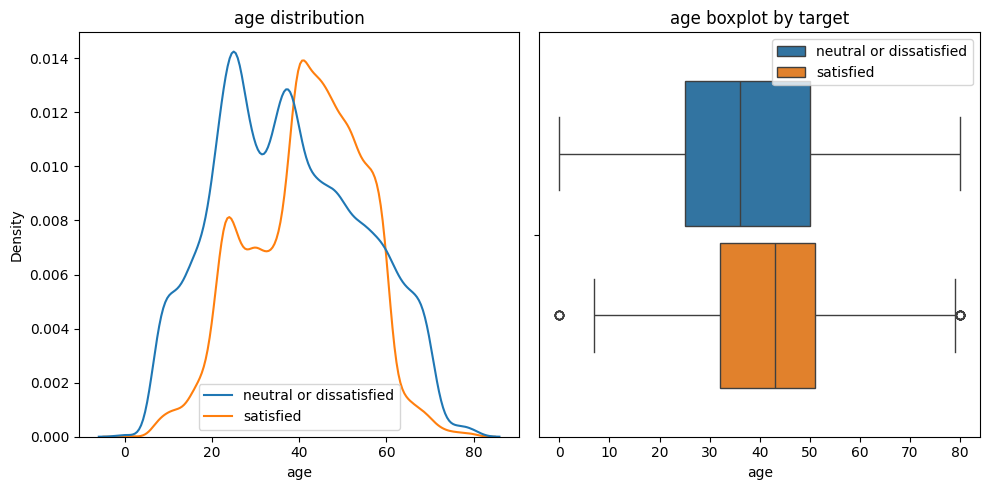

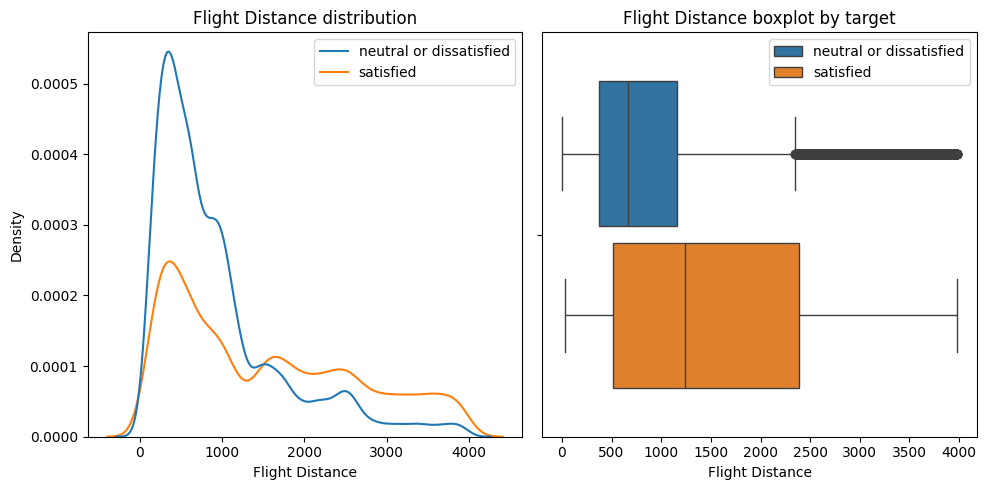

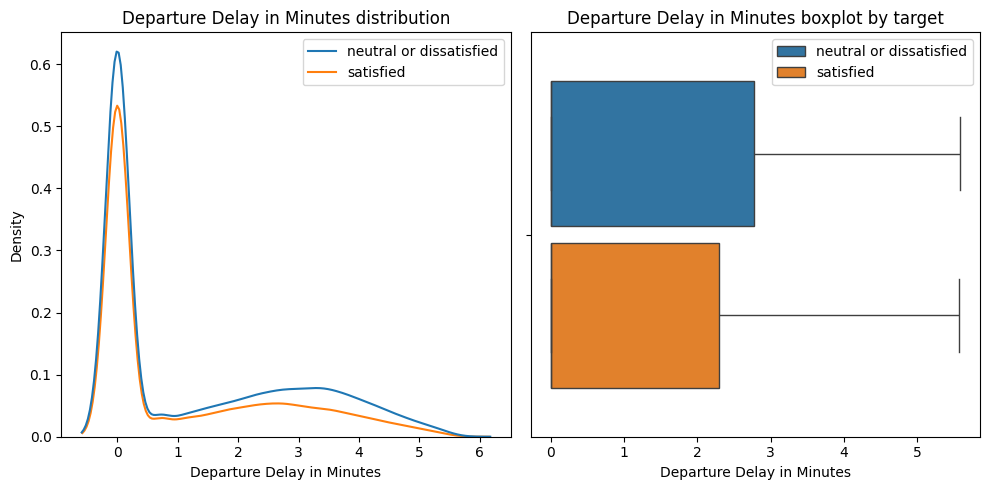

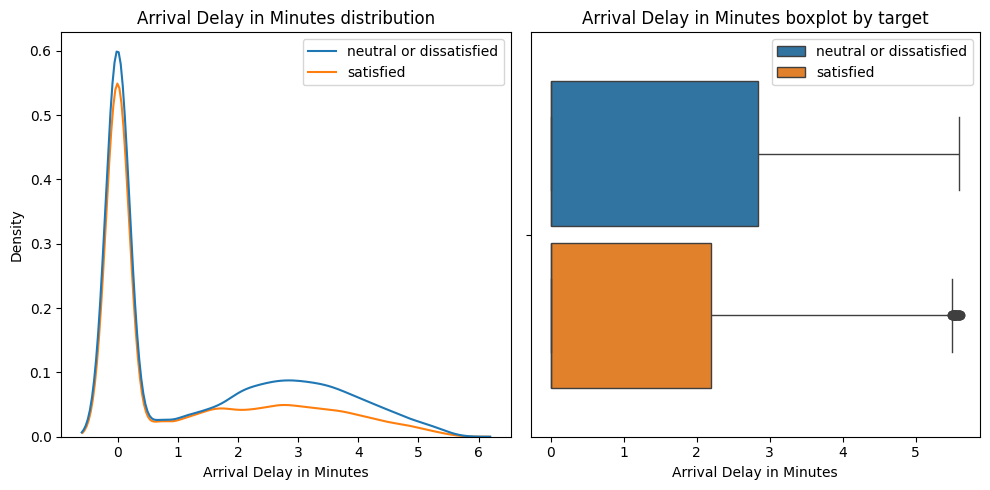

In [55]:
plot_continuous(continuous_cols, X_train, y_train)

<font color='#9933CC'>Закодируйте таргет таким образом, чтоб 'satisfied' перешел в 1, а остальные значения в 0</font>

In [56]:
target_transformer = FunctionTransformer(lambda y: y.map({'satisfied': 1, 'neutral or dissatisfied': 0}))
y_train_num = pd.Series(target_transformer.fit_transform(y_train), index=y_train.index)
y_val_num = pd.Series(target_transformer.transform(y_val), index=y_val.index)

In [57]:
y_train

id
2031      neutral or dissatisfied
11597                   satisfied
74668     neutral or dissatisfied
31602     neutral or dissatisfied
51518                   satisfied
                   ...           
63360     neutral or dissatisfied
29678     neutral or dissatisfied
118743    neutral or dissatisfied
8922                    satisfied
28513     neutral or dissatisfied
Name: satisfaction, Length: 71395, dtype: object

(0.25 балла) <font color='#9933CC'>Отобразите попарное распределение континуальных (по договоренности) признаков. Покрасьте точки на pairplot'е в соответствии с их классом</font>. Наблюдений много, так что отрисовка графика вполне может занять несколько минут

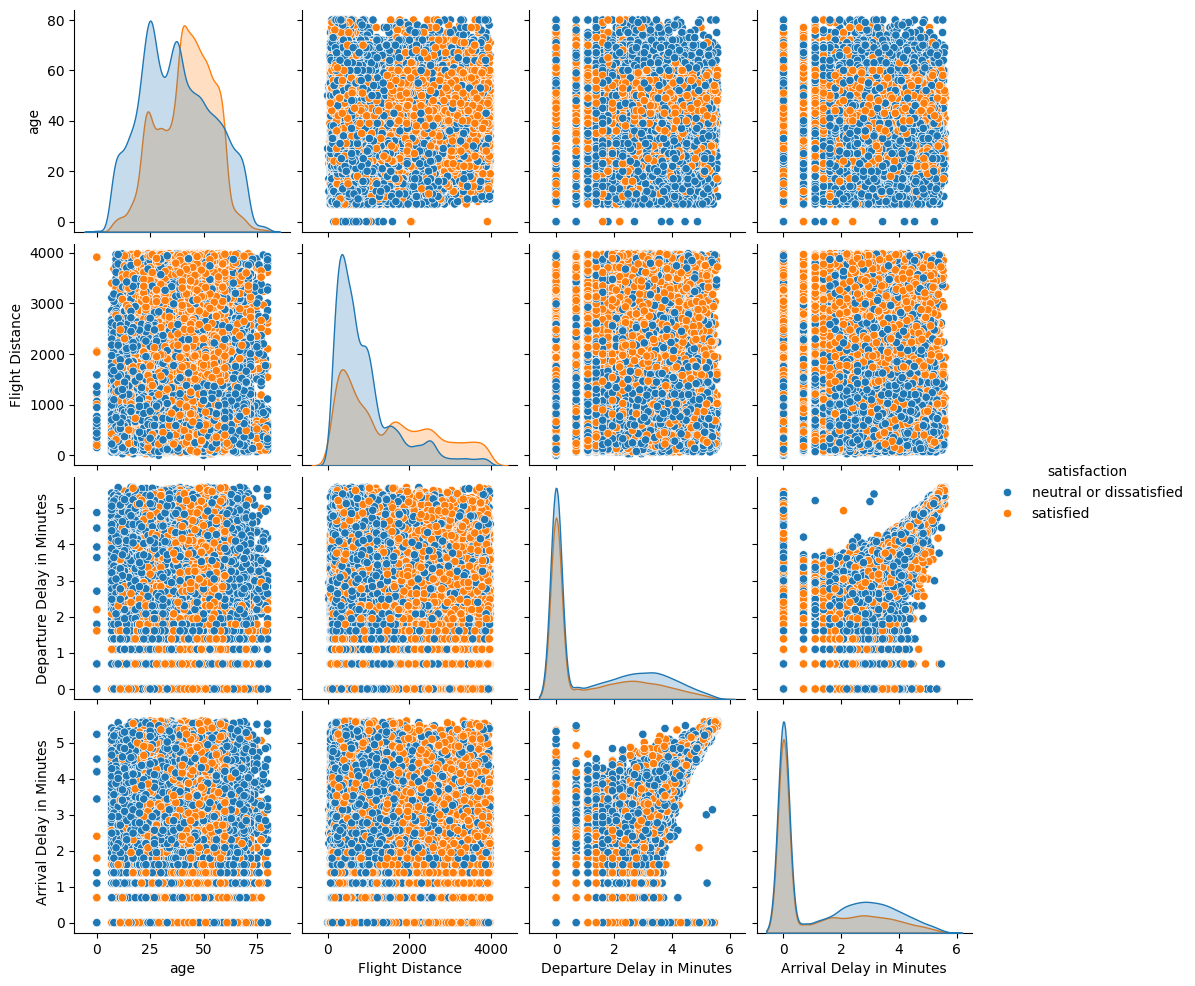

In [58]:

train_together = X_train.join(y_train)
sns.pairplot(train_together, hue='satisfaction', vars=continuous_cols)



# Decision Tree (3 балла)

(0.5 балла) <font color='#9933CC'>Закодируйте категориальные признаки методом OHE</font>. Для дерева используйте гиперпараметры по умолчанию.

In [59]:
transformer_one_hot = make_column_transformer((OneHotEncoder(drop='first'), categorical_cols))
transformer_one_hot.fit(X_train)
transformer_one_hot.get_feature_names_out()
X_train[transformer_one_hot.get_feature_names_out()] = transformer_one_hot.transform(X_train)
X_train = X_train.drop(columns=categorical_cols)

X_val[transformer_one_hot.get_feature_names_out()] = transformer_one_hot.transform(X_val)
X_val = X_val.drop(columns=categorical_cols)

df_test[transformer_one_hot.get_feature_names_out()] = transformer_one_hot.transform(df_test)
df_test = df_test.drop(columns=categorical_cols)



<font color='#9933CC'>Обучите дерево решений с параметрами по умолчанию на имеющихся данных.</font> Здесь и далее везде, где вас просят что-нибудь обучить, выводите `accuracy_score` для валидационной подвыборки

In [61]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train_num)
y_pred = tree_model.predict(X_val)
accuracy_score(y_val_num, y_pred)



0.942843137254902

## Деревья решений. Теоретическая вставка

(0.5 балла) <font color='#9933CC'>Посчитайте bias и variance для построенного дерева.</font> Для этого проще всего вспользоваться функцией `bias_variance_decomp()` из модуля mlxtend. Используйте '0-1_loss'

In [63]:
# change *params into what needs to be there by task condition

error_dt, bias_dt, var_dt = bias_variance_decomp(
    DecisionTreeClassifier(), X_train.values, y_train_num.values, X_val.values, y_val_num.values,
    loss='0-1_loss', random_seed=42,

)
error_dt, bias_dt, var_dt

(0.061874836601307194, 0.04098039215686274, 0.04608235294117648)

## Возвращение к задаче

(0.5 балла) <font color='#9933CC'>Выведите на экран barplot, демонстрирующий оценки важности признаков</font>



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



<Axes: >

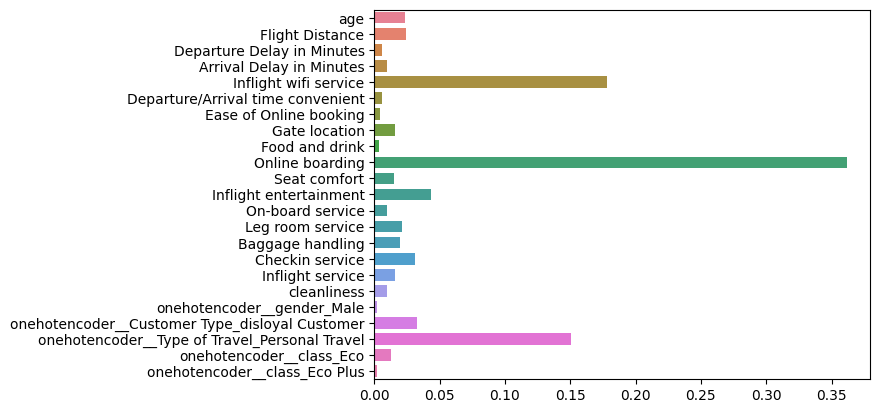

In [64]:
sns.barplot(x=tree_model.feature_importances_, y=tree_model.feature_names_in_, gap=0.1, palette='husl')



In [65]:
X_val.describe()

age  Flight Distance  Departure Delay in Minutes  \
count  30600.000000     30600.000000                30600.000000   
mean      39.334281      1184.429641                    1.202074   
std       15.165774       990.638837                    1.593892   
min        0.000000         0.000000                    0.000000   
25%       27.000000       416.000000                    0.000000   
50%       40.000000       840.000000                    0.000000   
75%       51.000000      1737.000000                    2.564949   
max       80.000000      3980.000000                    5.583496   

       Arrival Delay in Minutes  Inflight wifi service  \
count              30600.000000           30600.000000   
mean                   1.231359               2.727026   
std                    1.603683               1.323871   
min                    0.000000               0.000000   
25%                    0.000000               2.000000   
50%                    0.000000               3.000000   
75%                    2.564949               4.000000   
max                    5.602119               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       30600.000000            30600.000000   
mean                            3.057810                2.753235   
std                             1.527066                1.397145   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  ...  Leg room service  \
count   30600.000000    30600.000000     30600.000000  ...      30600.000000   
mean        2.974967        3.191634         3.240294  ...          3.360294   
std         1.275491        1.328669         1.350042  ...          1.313685   
min         1.000000        0.000000         0.000000  ...          0.000000   
25%         2.000000        2.000000         2.000000  ...          2.000000   
50%         3.000000        3.000000         3.000000  ...          4.000000   
75%         4.000000        4.000000         4.000000  ...          4.000000   
max         5.000000        5.000000         5.000000  ...          5.000000   

       Baggage handling  Checkin service  Inflight service   cleanliness  \
count      30600.000000     30600.000000      30600.000000  30600.000000   
mean           3.644346         3.299706          3.653856      3.281373   
std            1.171751         1.260952          1.167185      1.310554   
min            1.000000         0.000000          1.000000      0.000000   
25%            3.000000         3.000000          3.000000      2.000000   
50%            4.000000         3.000000          4.000000      3.000000   
75%            5.000000         4.000000          5.000000      4.000000   
max            5.000000         5.000000          5.000000      5.000000   

       onehotencoder__gender_Male  \
count                30600.000000   
mean                     0.492712   
std                      0.499955   
min                      0.000000   
25%                      0.000000   
50%                      0.000000   
75%                      1.000000   
max                      1.000000   

       onehotencoder__Customer Type_disloyal Customer  \
count                                    30600.000000   
mean                                         0.186078   
std                                          0.389176   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       onehot

<font color='#FF6600'>Какие признаки оказались наиболее информативными?</font>

In [66]:
print("Inflight wifi service, Online boarding, Type of Travel")



Inflight wifi service, Online boarding, Type of Travel


<font color='#9933CC'>Какой глубины получилось дерево? Сколько в нем листьев?</font>

In [67]:
tree_model.get_depth(), tree_model.get_n_leaves()


(35, 2912)

<font color='#9933CC'>Постройте дерево глубины 5, используя только 2 наиболее информативных признака для предыдущего построенного дерева</font>. <font color='#FF6600'>Насколько упало качество на тесте?</font>

In [68]:
short_tree_model = DecisionTreeClassifier(max_depth=5)
short_tree_model.fit(X_train[['Online boarding', 'Inflight wifi service']], y_train_num)
y_pred = short_tree_model.predict(X_val[short_tree_model.feature_names_in_])
accuracy_score(y_val_num, y_pred)


0.8248366013071895

(0.25 балла) <font color='#9933CC'>С помощью graphviz постройте получившееся дерево решений</font>. <font color='#FF6600'>Почему предикаты в нем не целые, а кратны 1/2?</font>

In [70]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(short_tree_model, out_file=None, 
                                feature_names=short_tree_model.feature_names_in_,  
                                filled=True)

# Draw graph
graph = Source(dot_data, format="png") 
graph


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

<font color='#9933CC'>Теперь постройте дерево той же глубины 5 для 2-х наиболее информативных континуальных (по договорённости) признаков</font>

In [71]:
short_tree_model = DecisionTreeClassifier(max_depth=5)
short_tree_model.fit(X_train[['age', 'Flight Distance']], y_train_num)
y_pred = short_tree_model.predict(X_val[short_tree_model.feature_names_in_])
accuracy_score(y_val_num, y_pred)


0.6836601307189543

(0.25 балла) <font color='#9933CC'>Отобразите его функцией `plot_tree()` из sklearn</font>. <font color='#FF6600'>Симметричным ли получилось дерево? Это хорошо или плохо?</font>

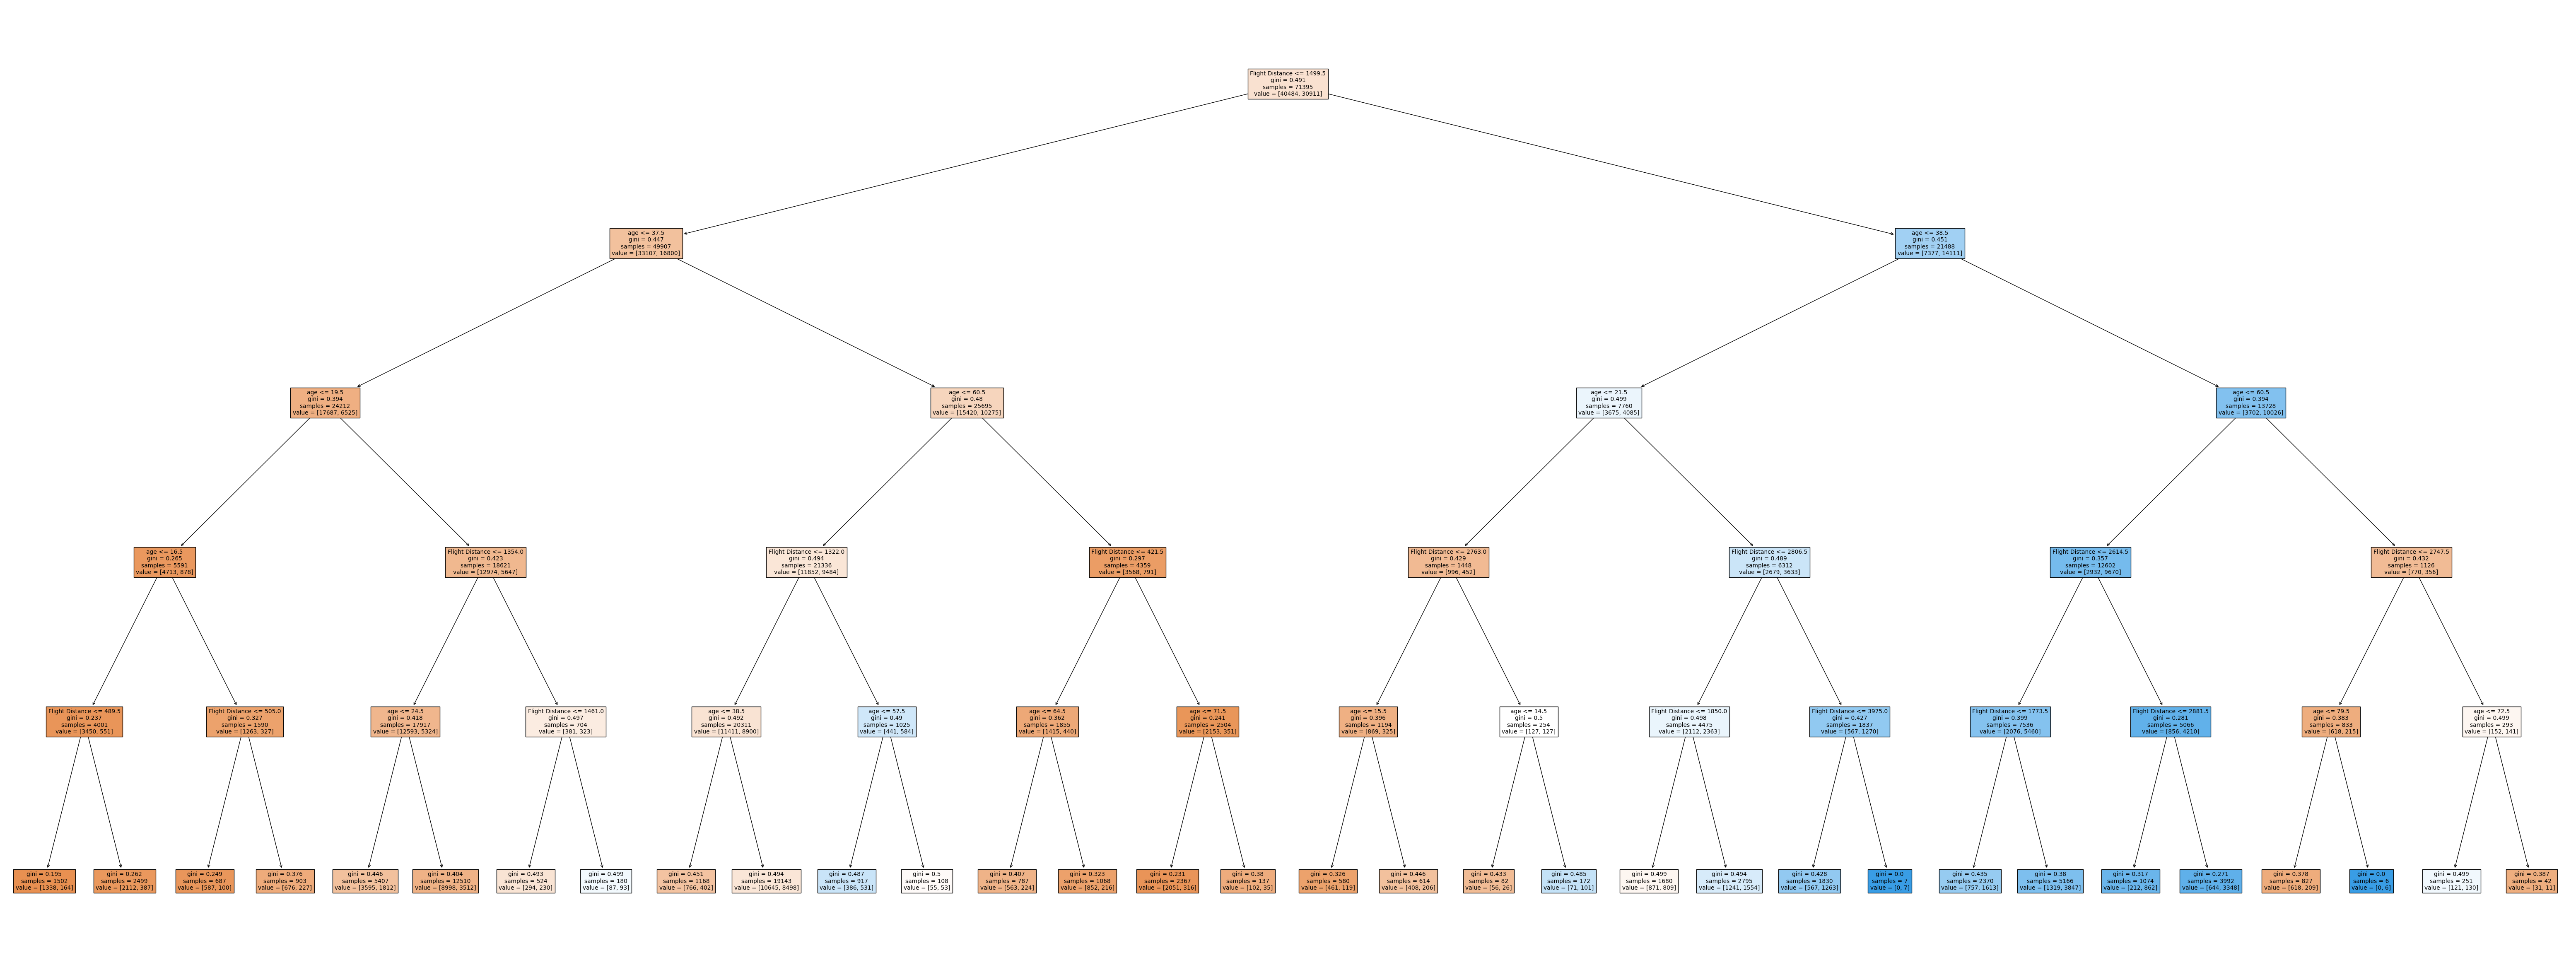

In [72]:
plt.figure(figsize=(80, 30))
plot_tree(short_tree_model, feature_names=short_tree_model.feature_names_in_, filled=True)
plt.show()


(0.5 балла) <font color='#9933CC'>Используя функцию `plot_decision_regions()` из `mlxtend`, отобразите разделяющую поверхность получившегося дерева.</font> Отметьте на графике только первые 100 объектов обучающей выборки

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


<Axes: >

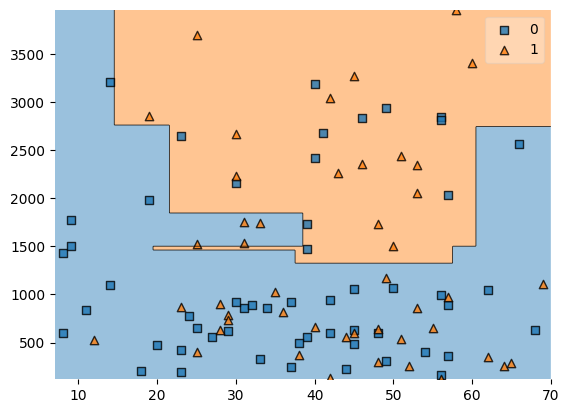

In [73]:
plot_decision_regions(X_train[:100][short_tree_model.feature_names_in_].values, y_val_num[:100].values, short_tree_model)



## Деревья решений. Теоретическая вставка 2

Из лекций вам должно быть известно, что деревья решений неустойчивы даже к небольшим изменениям в обучающей выборке. Попробуем показать это

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


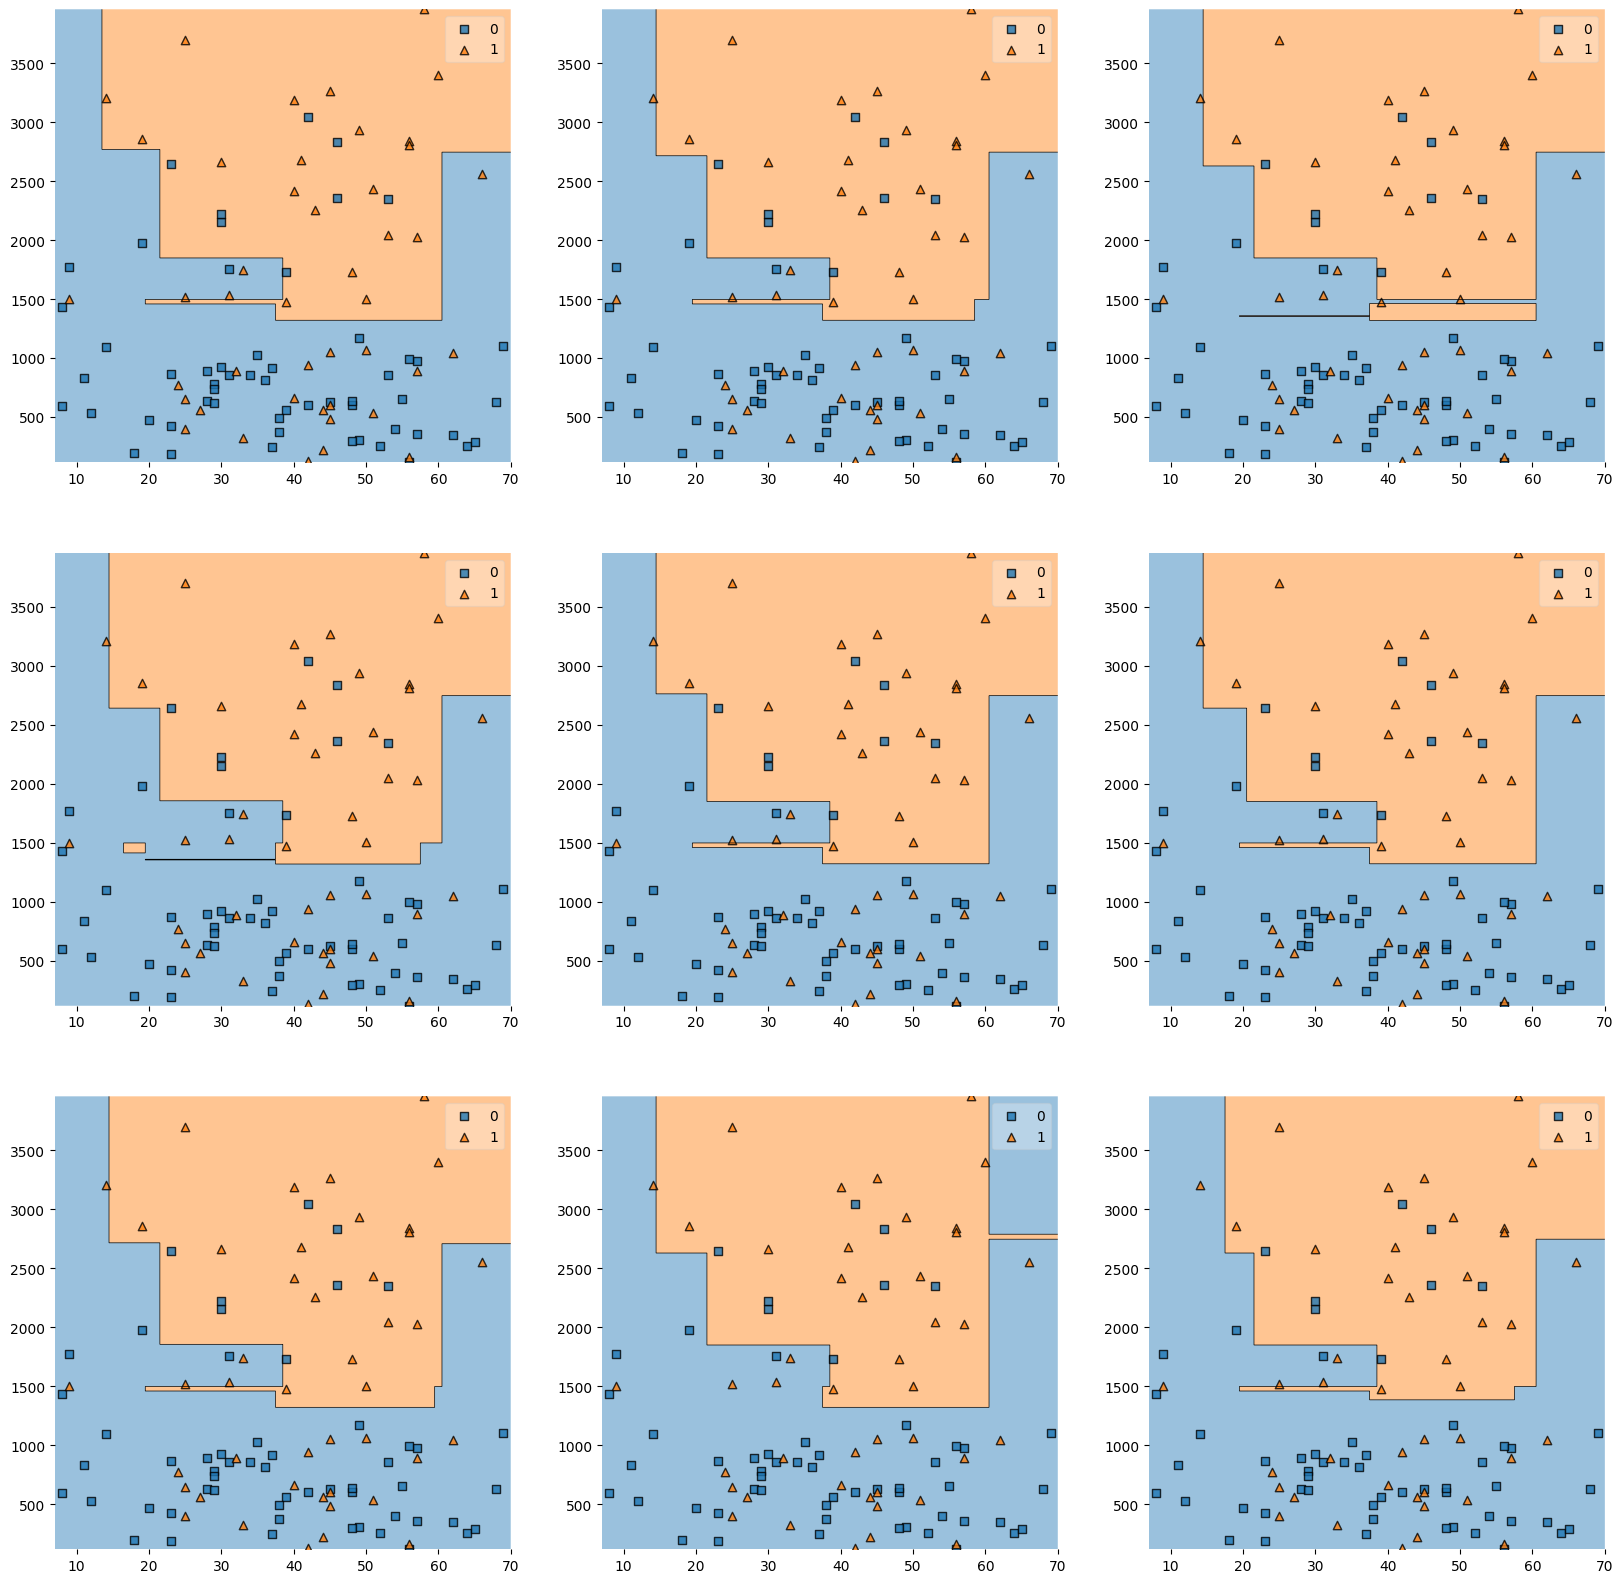

In [75]:
# change X_train_example to your equivalent

fig, ax = plt.subplots(3, 3, figsize=(20, 20))

X_train_example = X_train[short_tree_model.feature_names_in_]
for row in range(3):
    for col in range(3):
        inds = np.random.choice(X_train_example.index, size=X_train_example.shape[0] - 5000, replace=False) # нагляднее брать не на 1к, а на 5к меньше объектов, а то почти не изменяется разделяющая поверхность

        tree_exp = DecisionTreeClassifier(max_depth=5, random_state=42)
        tree_exp.fit(X_train_example.loc[inds, :], y_train_num[inds])

        plot_decision_regions(clf=tree_exp, X=X_train_example.iloc[:100, :].values, y=y_train_num[:100].values, ax=ax[row][col])


Мы убирали из трейна (а в нем ~80к наблюдений) всего по тысяче случайных объектов!

Помимо своей неусточивости деревья решений "славны" ещё и склонностью к переобучению. Посмотрим, можно ли увидеть это свойство на имеющихся у нас данных. Для этого будем обучать алгоритм DT на всем трейне с разной глубиной дерева и считать accuracy для теста

In [79]:
%%time 
depths = [2, 3, 5, 10, 15, 20, 25, 32, 50, 64, 75, 100]

accuracies_train = []
accuracies_test = []
for max_depth in depths:
    DT = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    DT.fit(X_train, y_train_num)
    y_predicted_train = DT.predict(X_train)
    y_predicted_val = DT.predict(X_val)
    accuracies_train.append(accuracy_score(y_train_num, y_predicted_train))
    accuracies_test.append(accuracy_score(y_val_num, y_predicted_val))


CPU times: total: 6 s
Wall time: 11.5 s


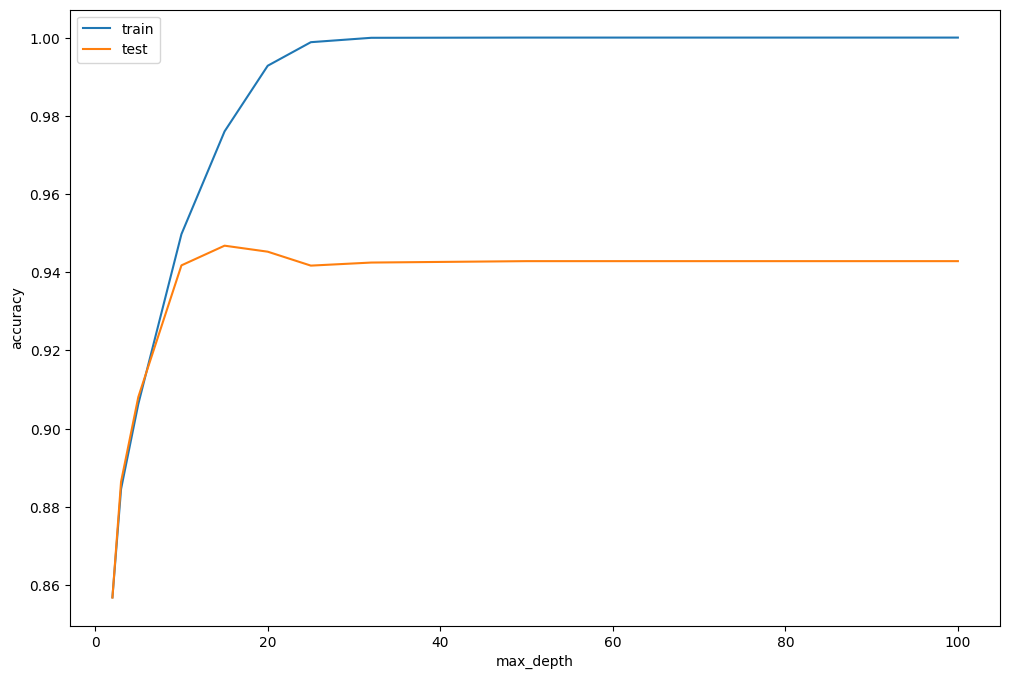

In [80]:
plt.figure(figsize=(12, 8))
plt.plot(depths, accuracies_train, depths, accuracies_test)
plt.legend(['train', 'test'])
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.show()


Нам повезло выйти на ассимптоту на тесте. Однако так бывает далеко не всегда. Так что подбирать гипрепараметры для деревьев решений стоит осторожно

## Возвращение к задаче

(0.5 балла) <font color='#9933CC'>На кроссвалидации подберите оптимальные гиперпараметры для дерева решений</font> *(по данным со всеми признаками -- не на модельном примере из теоретической вставки)*. <font color='#FF6600'>Удалось ли улучшить качество предсказаний подбором гиперпараметров?</font>

In [82]:
params = {
    'max_depth': np.arange(10, 100, 5),
    'splitter': ['best', 'random'],
    'min_samples_split': np.geomspace(5, 1000, 50, dtype=np.int32),
    'max_features': ['sqrt', 'log2'],
}
gs_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=16, cv=3, scoring='roc_auc', verbose=2)
gs_tree.fit(X_train, y_train_num)
display(gs_tree.best_estimator_)
display(gs_tree.best_score_)

best_model = gs_tree.best_estimator_
y_pred = best_model.predict(X_val)
accuracy_score(y_val_num, y_pred)


Fitting 3 folds for each of 3600 candidates, totalling 10800 fits


DecisionTreeClassifier(max_depth=25, max_features='sqrt', min_samples_split=92,
                       random_state=42)

0.974604473404593

0.9333660130718954

<font color='#9933CC'> Сохраните лучшее дерево в pickle </font>

*Мы просим это сделать, чтобы вы в случае чего не тратили время на переобучение, а могли банально подгрузить из файла*

In [83]:
with open('DT.pkl', 'wb') as f:
    pickle.dump(best_model, f)


# Random Forest (4 балла)

<font color='#9933CC'>Обучите случайный лес с параметрами по умолчанию</font>

In [85]:
forest_model = RandomForestClassifier(n_jobs=-1, random_state=42)
forest_model.fit(X_train, y_train_num)
y_pred = forest_model.predict(X_val)
accuracy_score(y_val_num, y_pred)



0.9611764705882353

(0.75 балла) <font color='#9933CC'>Выведите калибровочную кривую для полученного ансамбля</font>

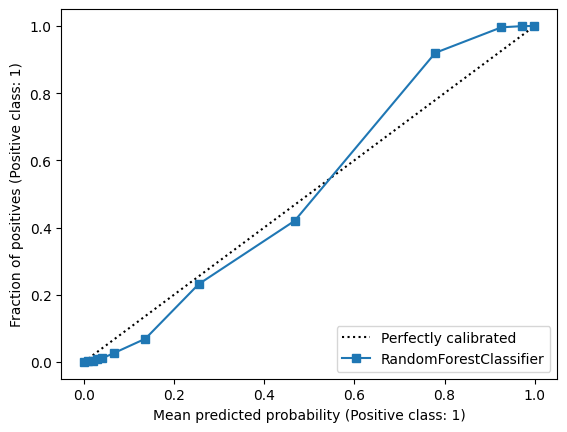

In [86]:
CalibrationDisplay.from_estimator(forest_model, X_val, y_val_num, n_bins=20, strategy='quantile')



Похоже, мы немного недооцениваем высокие вероятности

<img src='https://habrastorage.org/r/w1560/getpro/habr/upload_files/510/4e0/63b/5104e063b62bd0ac6b87da44a3034aa5.png'>

Изображение взято из статьи ["predict_proba в Python не прогнозирует вероятности (и как с этим бороться)"](https://habr.com/ru/company/otus/blog/573924/) с Хабра

<font color='#FF6600'>Вспомните (или выведите), корректно ли деревья предсказывают вероятности?</font>

In [ ]:
# your answer below
# feel free to change this cell into markdown



<font color='#9933CC'>Обучите логистическую регрессию с параметрами по умолчанию и отобразите её калибровочную кривую</font>

UPD: не с параметрами по умолчанию, а так, чтоб сошлась

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

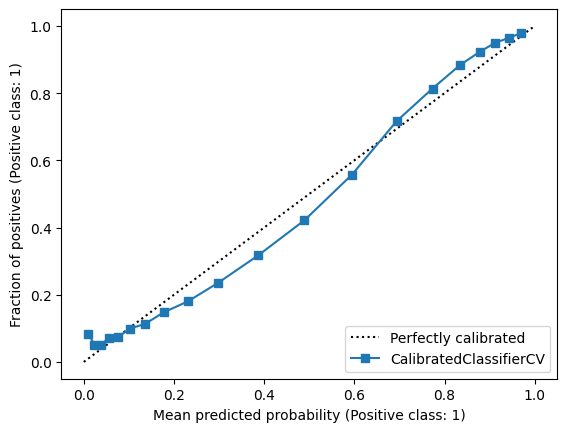

In [87]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_clf = CalibratedClassifierCV(LogisticRegression(), cv=3, method='sigmoid')
calibrated_clf.fit(X_train, y_train_num)
CalibrationDisplay.from_estimator(calibrated_clf, X_val, y_val_num, n_bins=20, strategy='quantile')


Мы немного переоцениваем предсказанные низкие вероятности

<font color='#FF6600'>Покажите, почему считается, что логистическая регрессия корректно предсказывает вероятности?</font>

In [ ]:
# maths needed



(0.75 балла) <font color='#9933CC'>Предлагаем вам попробовать откалибровать вероятности обученного случайного леса</font>. Для этого воспользуйтесь логистической и изотонической регрессиями. <font color='#FF6600'>Интерпретируйте полученные результаты</font>

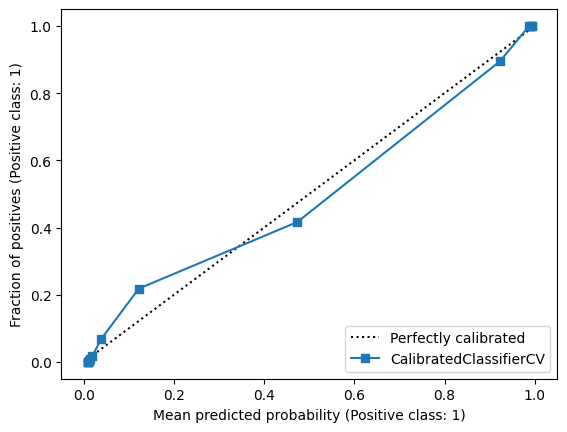

In [89]:
calibrated_clf_logreg = CalibratedClassifierCV(forest_model, method='sigmoid', cv=3)
calibrated_clf_logreg.fit(X_train, y_train_num)
CalibrationDisplay.from_estimator(calibrated_clf_logreg, X_val, y_val_num, n_bins=20, strategy='quantile')


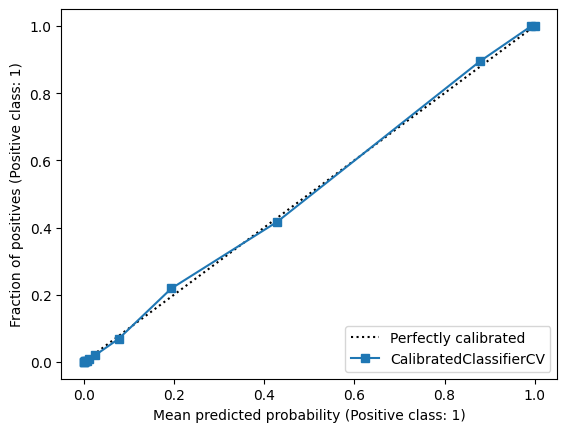

In [90]:
calibrated_clf_isoreg = CalibratedClassifierCV(forest_model, method='isotonic', cv=3)
calibrated_clf_isoreg.fit(X_train, y_train_num)
CalibrationDisplay.from_estimator(calibrated_clf_isoreg, X_val, y_val_num, n_bins=20, strategy='quantile')




<font color='#FF6600'>Опишите другие возвожные подходы к калбировке вероятностей (со ссылками на источники)</font>

In [ ]:
# feel free to change this cell into markdown



(1 балл) <font color='#9933CC'>Посчитайте разброс и смещение полученного случайного леса (до калибровки).</font><font color='#FF6600'>Оличаются ли они от полученных для дерева решений? Соответствуют ли полученные на реальных данных отличия (//совпадения) от тех, что должны быть в теории? По каким причинам?</font>

In [93]:
error_dt, bias_dt, var_dt = bias_variance_decomp(
    forest_model, X_train.values, y_train_num.values, X_val.values, y_val_num.values,
    loss='0-1_loss', random_seed=42,
)
error_dt, bias_dt, var_dt



KeyboardInterrupt: 

<font color='#9933CC'>Вычислите разложение ошибки для логистической регрессии (ванильной, не той, что использовали для калибровки).</font> <font color='#FF6600'>Сравните полученные результаты с предыдущими. Объясните природу этих результатов</font>

In [94]:
pass

(1 балл) <font color='#9933CC'>Попробуйте подобрать оптимальные гиперпараметры, используя `RandomizedSearchCV`</font>. Хотя бы один из гиперпараметров перебирайте из распределения (например, `uniform` из `scipy.stats`)

In [ ]:
from scipy.stats import randint
params = {
    'n_estimators': randint(10, 100),
    'max_depth': np.geomspace(1, 100, 5, dtype=np.int32),
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': np.geomspace(2, 1000, num=50, dtype=np.int32),
    'min_samples_leaf': np.geomspace(2, 1000, num=50, dtype=np.int32),
}
rs_model = RandomizedSearchCV(
    RandomForestClassifier(random_state=RANDOM_SEED, n_jobs=-1),
    params,
    n_jobs=-1,
    scoring='accuracy',
    cv=3, 
    n_iter=500,
    verbose=2,
    random_state=RANDOM_SEED,
    )
rs_model.fit(X_train, y_train_num)
display(rs_model.best_estimator_, rs_model.best_score_)
y_pred = rs_model.best_estimator_.predict(X_val)
accuracy_score(y_val_num, y_pred)


## Случайный лес. Вставка теории

На модельном примере посмотрим, склонен ли случайный лес к переобучению с ростом числа деревьев в композиции.

Возьмем 4 полезных признака из одного из предыдщущих заданий, напоминающих теорию

In [ ]:
# change X_train_enc into you equivalent

cols_for_RF = ['age', 'Flight Distance', 'Online boarding', 'Inflight wifi service']
X_train_RF = X_train_enc[cols_for_RF]
# а тест нам не понадобится, ведь можно получить OOB-estimate ошибки

clf = RandomForestClassifier(warm_start=True, oob_score=True, random_state=42)
errors = []

for n_estimators in range(1, 251, 5):
    clf.set_params(n_estimators=n_estimators)
    clf.fit(X_train_RF, y_train)

    errors.append(1 - clf.oob_score_)

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.


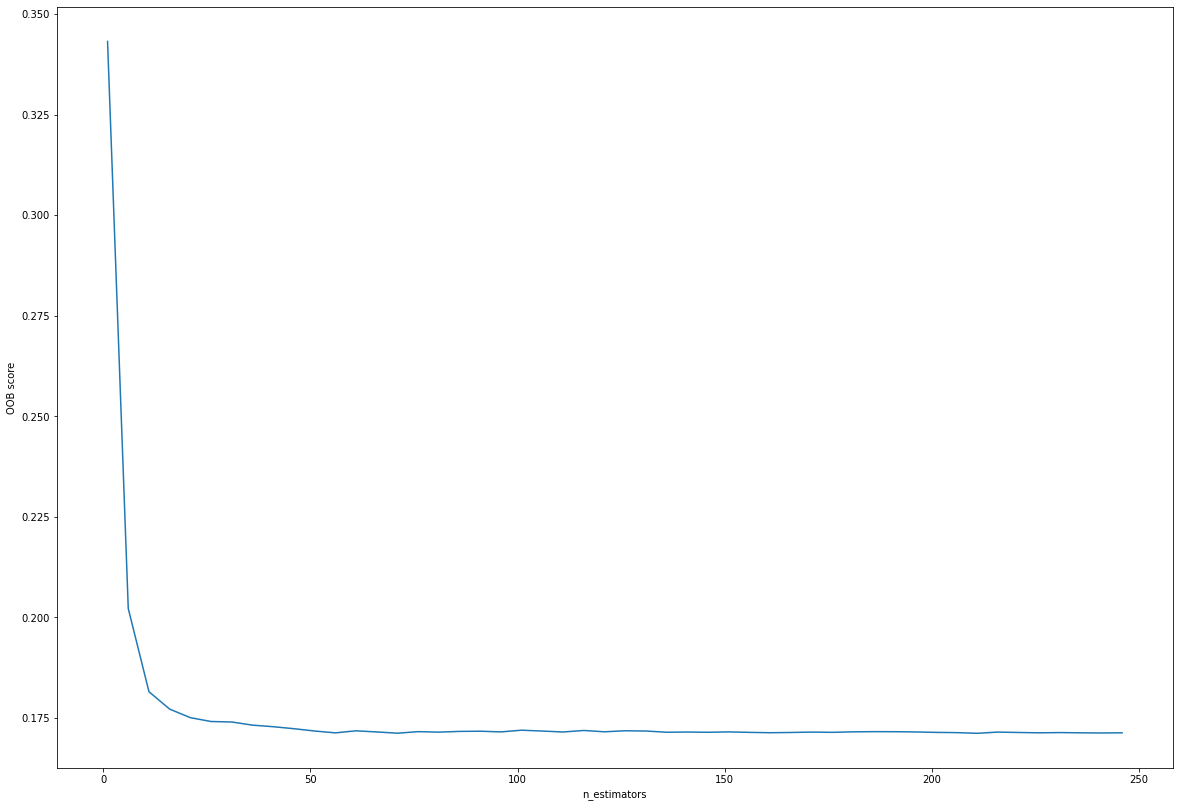

In [ ]:
plt.figure(figsize=(20, 14))
plt.plot(range(1, 251, 5), errors)

plt.xlabel('n_estimators')
plt.ylabel('OOB score')
plt.show()

> **Дисклеймер**: отсутствие переобучения с ростом числа деревьев вовсе не означает, что сама модель случайного леса не может быть переобучена. Базовые деревья такой композиции могут переобучаться. Значит, и вся композиция вполне способна оказаться переобученной 

## Возвращение к задаче

<font color='#9933CC'>Отобразите `feature_importances_` вашего лучшего случайного леса</font>

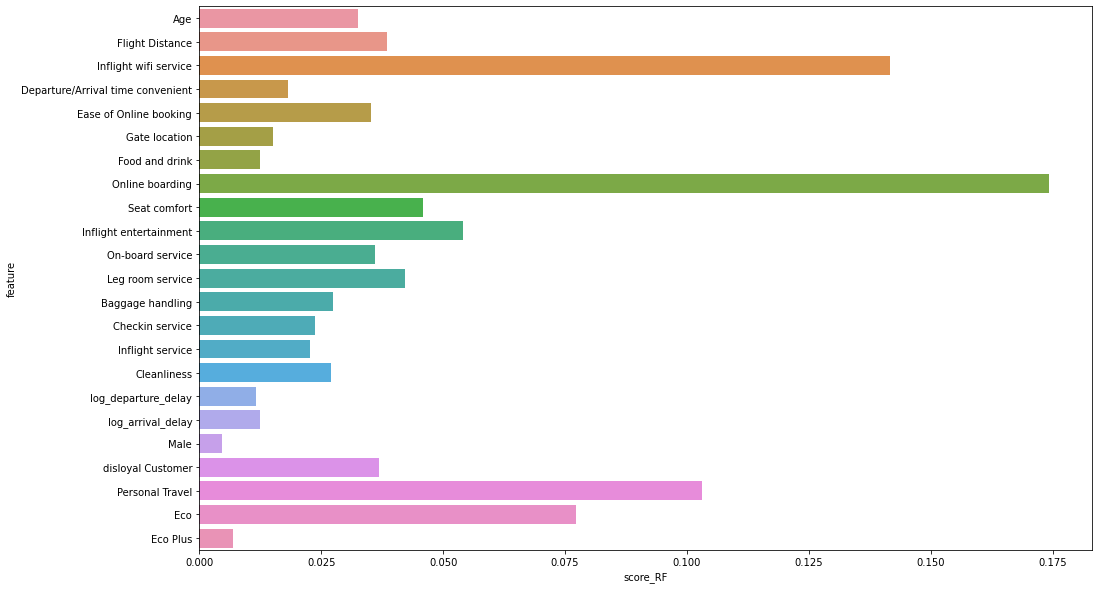

In [ ]:
# (•_•)

(0.5 балла) <font color='#9933CC'>Сравните важности признаков для дерева решений и для случайного леса. Постройте диаграмму</font>

In [ ]:
# -__-

Бонус (0.5 балла) <font color='#9933CC'>Интерпретируйте важности признаков с помощью SHAP</font>. Для подсчета используйте 1000 случайных объектов, иначе не дождетесь за приемлемое время

[Статья "Интерпретация моделей и диагностика сдвига данных: LIME, SHAP и Shapley Flow"](https://habr.com/ru/company/ods/blog/599573/) из блога ods.ai на Хабре

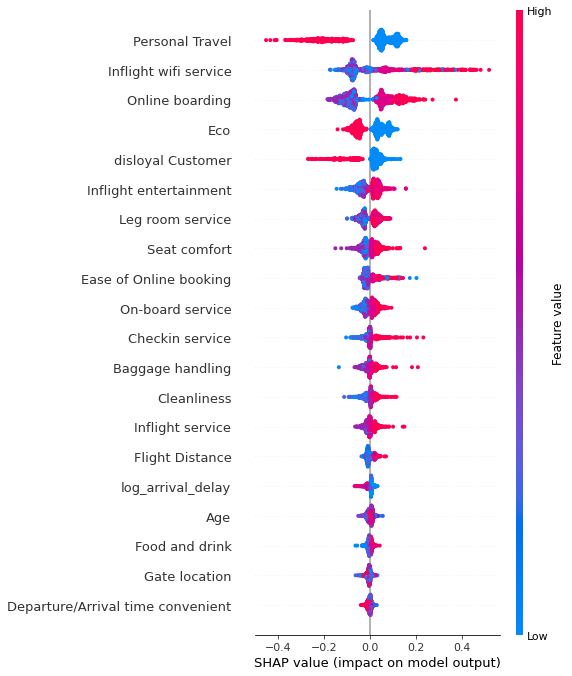

CPU times: user 5min 45s, sys: 2.77 s, total: 5min 47s
Wall time: 5min 45s


In [ ]:
# (•_•)


<font color='#FF6600'>Опишите полученый график</font>

In [ ]:
# your explanation below


<font color='#FF6600'>Изучите документацию библиотеки SHAP. Что ещё полезного в ней имеется? </font>

In [ ]:
# feel free to change this cell into markdown



Бонус (0.5 балла) <font color='#9933CC'>Интерпретируйте важности признаков с помощью LIME</font>

In [ ]:
# please type your solution below



X does not have valid feature names, but RandomForestClassifier was fitted with feature names


CPU times: user 13 s, sys: 918 ms, total: 13.9 s
Wall time: 16.1 s


<font color='#FF6600'>Опишите полученый график</font>

In [ ]:
# your explanation below


<font color='#9933CC'>Случайное лес, дающий лучший скор, сохраните в pickle</font>

# Обратная связь

Расскажите, как вам это домашнее задание. Было ли оно полезным? Научились ли вы чему то? Насколько сложным по 10-балльной шкале оно вам показалось? Сколько времени у вас ушло на его выполнение? Что следовало ещё в него включить? Было ли что-то лишнее?